<a href="https://colab.research.google.com/github/SK052701/LInkedIn-Job-Market-Analysis/blob/main/Linked_In_Job_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
#linked-in jobs
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LinkedInJobs_MLDataset.csv")
df.head()

,Co_Nm,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Job_Ttl,Job_Desc,Is_Supvsr,max_sal,med_sal,min_sal,...,st_code,is_remote,views,app_typ,app_is_off,xp_lvl,domain,has_post_domain,is_sponsored,base_comp
0,HearingLife,True,1171,11417,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,False,5250.00,5250.00,5250.00,...,SC,0,9,OffsiteApply,True,Entry level,careers-demant.icims.com,True,0,1
1,"Metalcraft of Mayville, Inc.",True,300,2923,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,False,0.00,0.00,0.00,...,WI,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
2,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,"Manager, Engineering",The TSUBAKI name is synonymous with excellence...,True,0.00,0.00,0.00,...,AL,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
3,Episcopal Communities & Services,True,36,305,Cook,descriptionTitle\n\n Looking for a great oppor...,False,22.27,22.27,22.27,...,CA,0,1,OffsiteApply,True,Entry level,jobs.apploi.com,True,0,1
4,"iHerb, LLC",True,1227,51933,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",False,275834.00,240895.00,205956.00,...,XF,1,0,OffsiteApply,True,Mid-Senior level,careers.iherb.com,True,0,1


In [3]:
df.columns #features of the data set

Index(['Co_Nm', 'Co_Pg_Lstd', 'Emp_Cnt', 'Flw_Cnt', 'Job_Ttl', 'Job_Desc',
       'Is_Supvsr', 'max_sal', 'med_sal', 'min_sal', 'py_prd', 'py_lstd',
       'wrk_typ', 'loc', 'st_code', 'is_remote', 'views', 'app_typ',
       'app_is_off', 'xp_lvl', 'domain', 'has_post_domain', 'is_sponsored',
       'base_comp'],
      dtype='object')

In [4]:
df.shape #(numbers of observations, number of features)

(33246, 24)

# Data Exploration

### Company Employee Count vs Minimum Salary

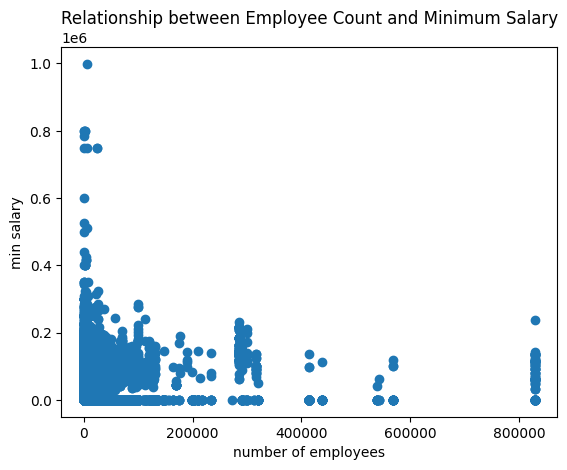

In [5]:
plt.scatter(df['Emp_Cnt'], df['min_sal'])
plt.xlabel('number of employees')
plt.ylabel('min salary')
plt.title('Relationship between Employee Count and Minimum Salary')
plt.show()


Looks like the greatest salary variance exists in jobs where the employee count is very low.

Start ups? Let's find out the median salary for the top 25 salaries, the name of those companies, and the average number of employees at those companies.

### Top 25 Companies with the Highest Minimum Salaries

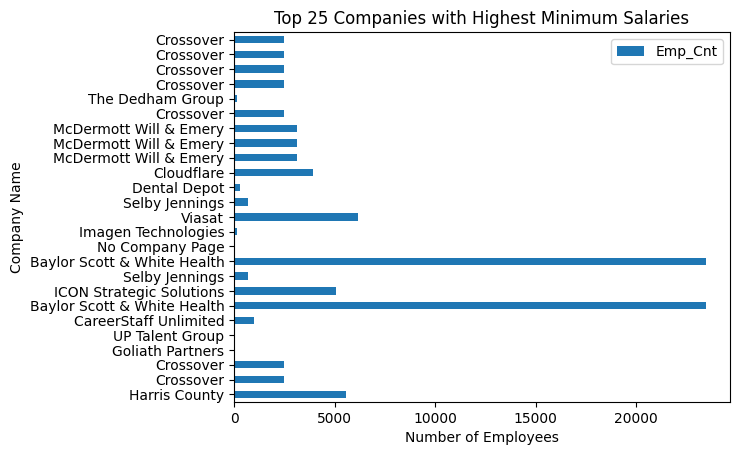

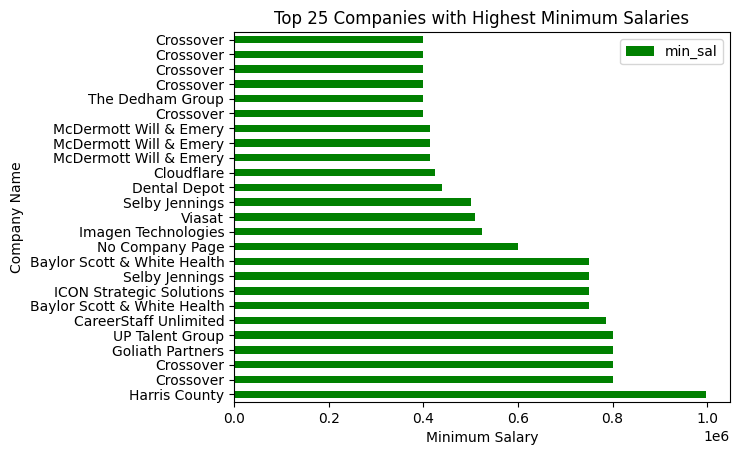

In [6]:

sorted_data = df.sort_values(by=['min_sal'], ascending=False)
top_25 = sorted_data.head(25)
top_25.head()
top_25.plot(x='Co_Nm', y='Emp_Cnt', kind='barh')
plt.xlabel('Number of Employees')
plt.ylabel('Company Name')
plt.title('Top 25 Companies with Highest Minimum Salaries')
plt.show()
top_25.plot(x='Co_Nm', y='min_sal', kind='barh', color='green')
plt.xlabel('Minimum Salary')
plt.ylabel('Company Name')
plt.title('Top 25 Companies with Highest Minimum Salaries')
plt.show()


Never heard of any one of them...lol

But apperantly not too long ago those where the big Gs on LinkedIn, paying the the highest minimum salaries.

For all of them, with the exception of 'Baylor Scott and White Health', the employee count is around 5000 or less (in most instances).

A very small collective of people making the big bucks!


### Average Median Salary on LinkedIn for each state

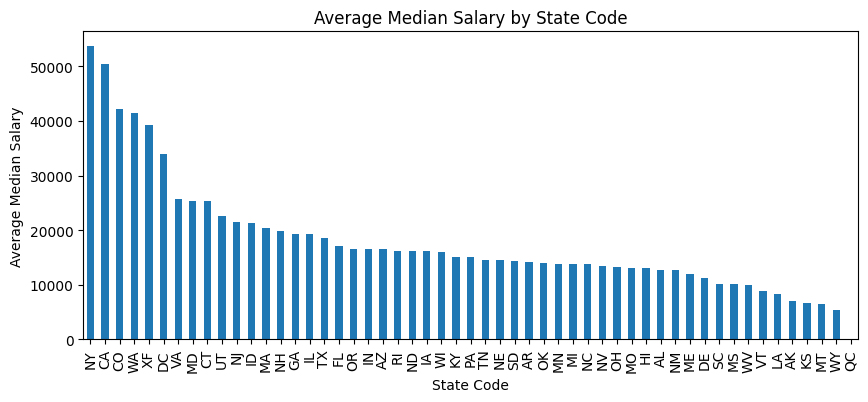

In [7]:
# prompt: group the df data frame by state code('st_code') and find the mean median salary('med_sal') for each state code, plot a bar graph with state codes on the x-axis and average median salary on the y-axis  such that the salaries are in decreasing order and the axis in prolonged so that the state labels are not squeezed together?
plt.figure(figsize = (10,4))
df.groupby('st_code')['med_sal'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('State Code')
plt.ylabel('Average Median Salary')
plt.title('Average Median Salary by State Code')
plt.show()


Looks like New York, California, Colorado, Washington, and District of Columbia formed a group of relatively high paying jobs on LinkedIn compared to the rest of the country.

What is Colorado doing up there?!

New York and California are in a league of their own.

### Average Maximum Salary for each state on LinkedIn

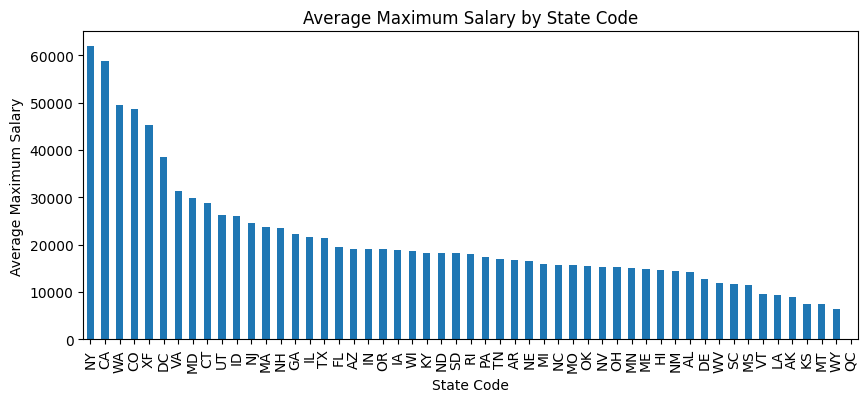

In [8]:
plt.figure(figsize = (10,4))
df.groupby('st_code')['max_sal'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('State Code')
plt.ylabel('Average Maximum Salary')
plt.title('Average Maximum Salary by State Code')
plt.show()

The group didn't change much.
New York and California still dominate everyone else.
Surprisingly Colorado is still holding srong.


### Salary vs Job Type (remote/onsite)

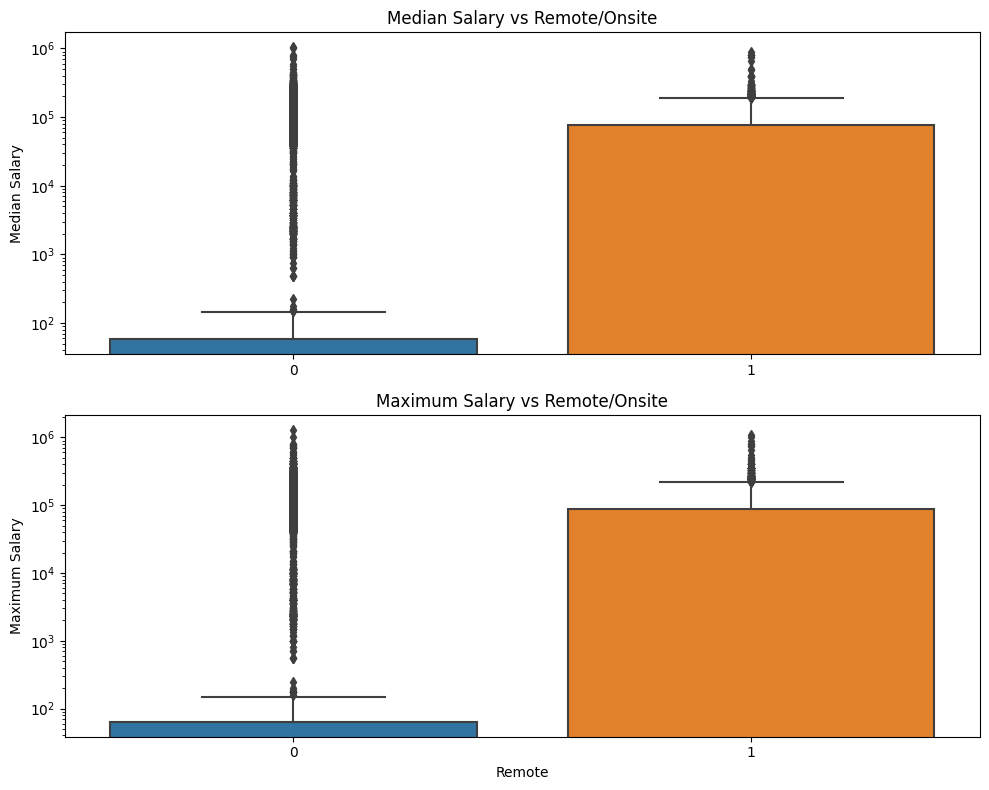

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Boxplot in the first subplot with a log-scaled y-axis
sn.boxplot(data=df, x='is_remote', y='med_sal', ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Median Salary vs Remote/Onsite')
axes[0].set_ylabel('Median Salary')
axes[0].set_xlabel('')


# Boxplot in the second subplot with a different y-axis and log scale
sn.boxplot(data=df, x='is_remote', y='max_sal', ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title('Maximum Salary vs Remote/Onsite')
axes[1].set_ylabel('Maximum Salary')
axes[1].set_xlabel('Remote')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Seems that the people that work remotely have a better chance of earning a relatively higher salary.

The salary variance is greater for the remote job cohort compared to the onsite cohort for both the median and maximum salaries.

Lets look at the relationship between Experience Level and Median/Maximum salaries, seperated for remote and onsite jobs.

### Experience Level vs Salary

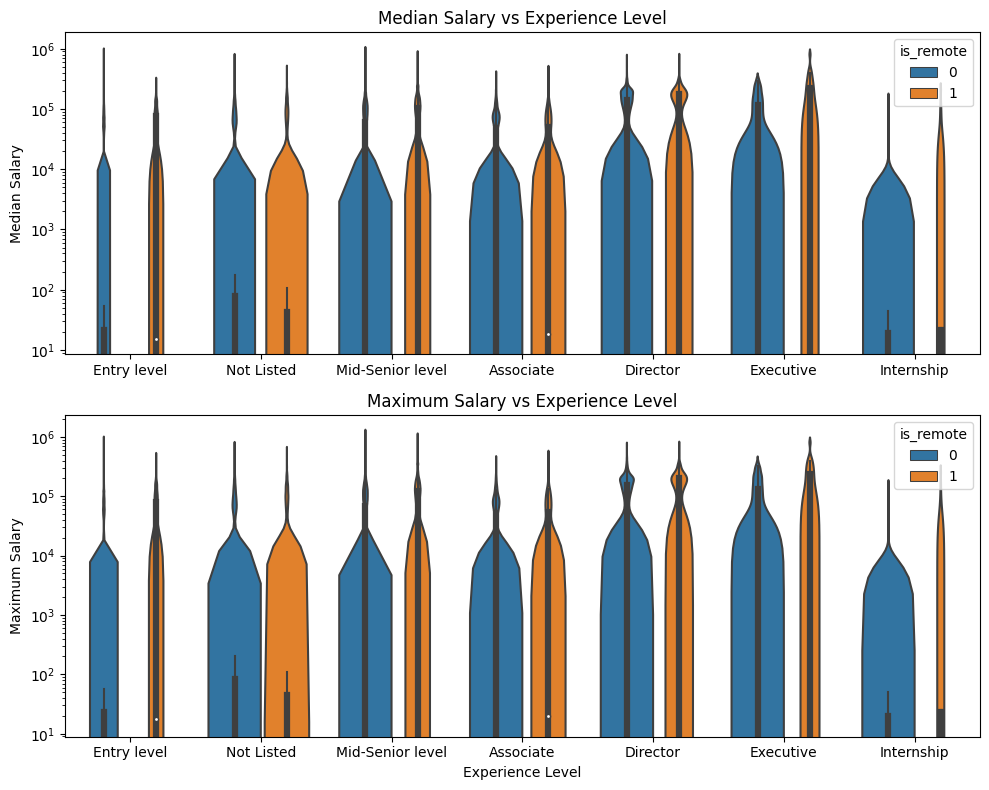

In [10]:
# prompt: correct the below code

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Boxplot in the first subplot with a log-scaled y-axis
sn.violinplot(data=df, x='xp_lvl', y='med_sal', ax=axes[0], hue = 'is_remote')
axes[0].set_yscale('log')
axes[0].set_title('Median Salary vs Experience Level')
axes[0].set_ylabel('Median Salary')
axes[0].set_xlabel('')


# Boxplot in the second subplot with a different y-axis and log scale
sn.violinplot(data=df, x='xp_lvl', y='max_sal', ax=axes[1], hue = 'is_remote')
axes[1].set_yscale('log')
axes[1].set_title('Maximum Salary vs Experience Level')
axes[1].set_ylabel('Maximum Salary')
axes[1].set_xlabel('Experience Level')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Based on the above relative candle fatness, we see that remote work for any exprerience level is less popular compared to onsite jobs (fewer data points make the candle slim).

Even though the earning potential is either the same or even better than that of onsite jobs across all experience levels.

### Salary Distributions across Experience Levels

Text(0.5, 1.0, 'Median Salary distribution for each Experience Level')

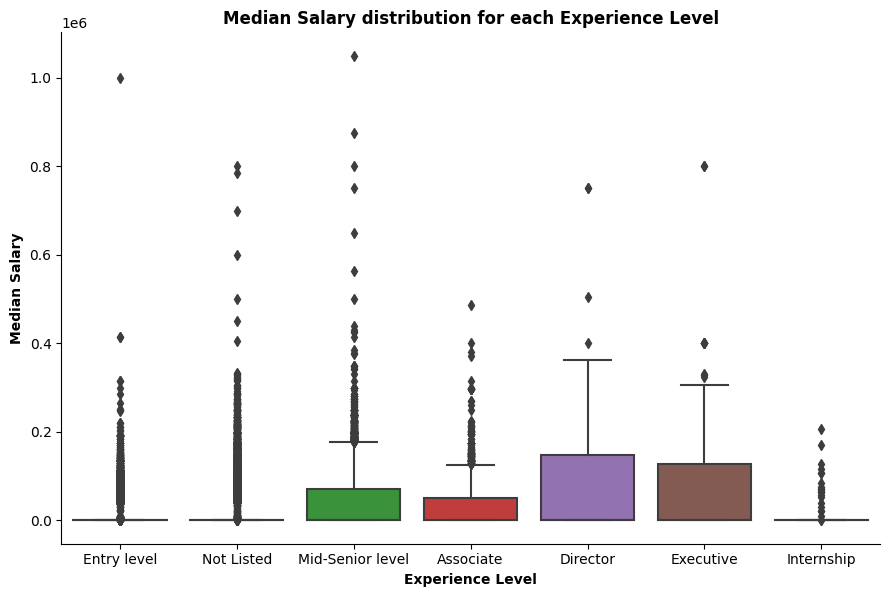

In [11]:
sn.catplot(x='xp_lvl', y='med_sal', kind='box', data=df, height=6, aspect=1.5)
plt.xlabel('Experience Level', fontdict={'weight': 'bold'})
plt.ylabel('Median Salary', fontdict={'weight': 'bold'})
plt.title('Median Salary distribution for each Experience Level', fontdict={'weight': 'bold'})


Text(0.5, 1.0, 'Median Salary distribution for each Experience Level')

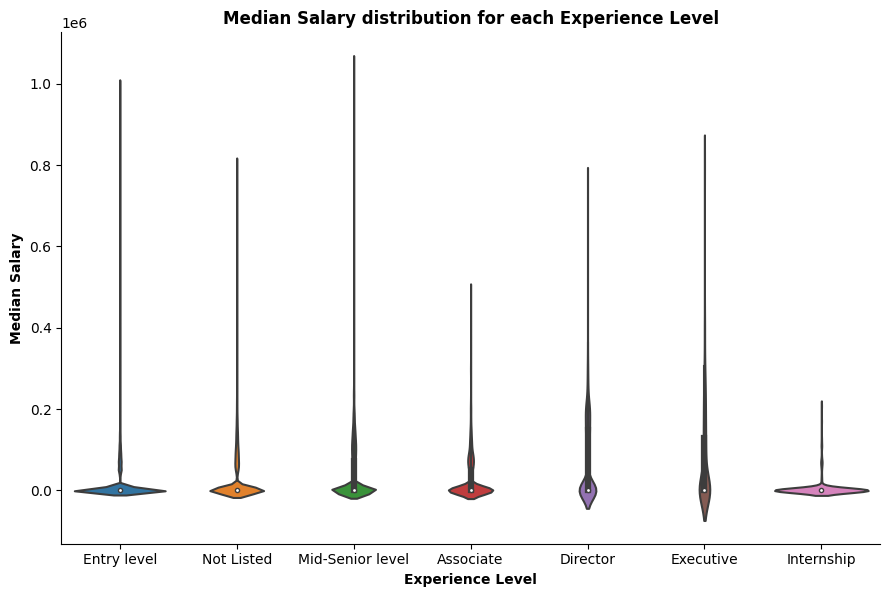

In [12]:
sn.catplot(x='xp_lvl', y='med_sal', kind='violin', data=df, height=6, aspect=1.5)
plt.xlabel('Experience Level', fontdict={'weight': 'bold'})
plt.ylabel('Median Salary', fontdict={'weight': 'bold'})
plt.title('Median Salary distribution for each Experience Level', fontdict={'weight': 'bold'})


The interns and entry level earn very similar.

Surprisingly, there are some job offers for mid-seniors that pay more than some directors get at different places.

The rest makes sense, Director>Executive>Associate>Mid-Senior in terms pay.



### Remote vs Onsite ratio

In [13]:
rem_num = df['is_remote'].sum()
onsight_num = df.shape[0] - rem_num

perc_on = (onsight_num/df.shape[0])*100
perc_rem = (rem_num/df.shape[0])*100

print(perc_on, perc_rem)

85.55615713168501 14.443842868314984


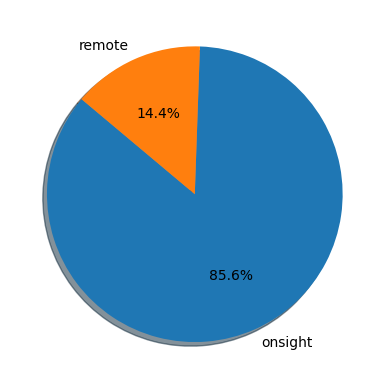

In [14]:
plt.pie(x= [perc_on, perc_rem], labels=['onsight','remote'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

The overwhelming majority of people work onsight, even though the earning potential is much better in remote jobs (as shown above).

### Distribution of Experience Levels

Text(0.5, 1.0, 'Distribution of Experience Levels')

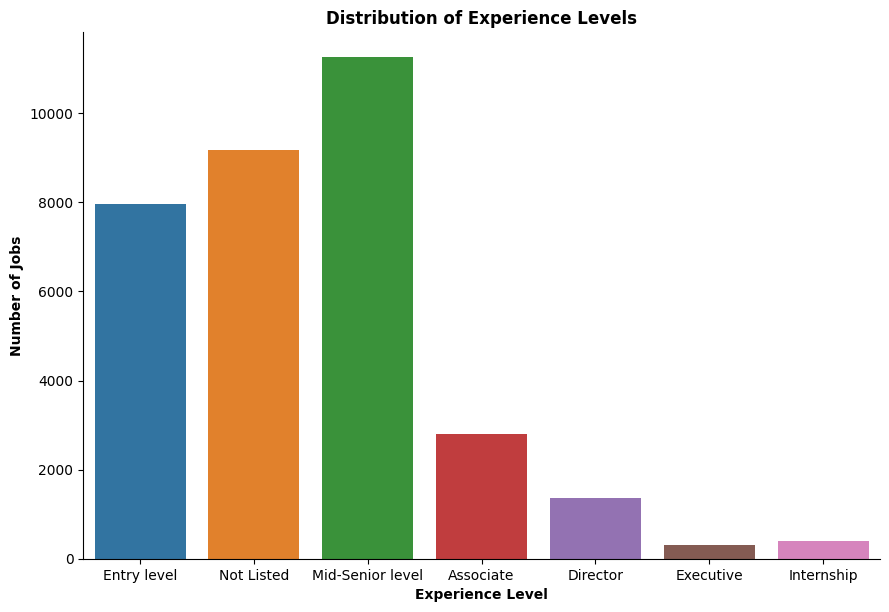

In [15]:
# prompt: plot the distribution of experience levels 'xp_level' in the dataset

sn.catplot(x='xp_lvl', kind='count', data=df, height=6, aspect=1.5)
plt.xlabel('Experience Level', fontdict={'weight': 'bold'})
plt.ylabel('Number of Jobs', fontdict={'weight': 'bold'})
plt.title('Distribution of Experience Levels', fontdict={'weight': 'bold'})


There seems to be a great lack of mid-senior level positions on the job market, which gives those positions the highest demand.

Entry level positions come in at second place.

### Distribution of Job Postings per State

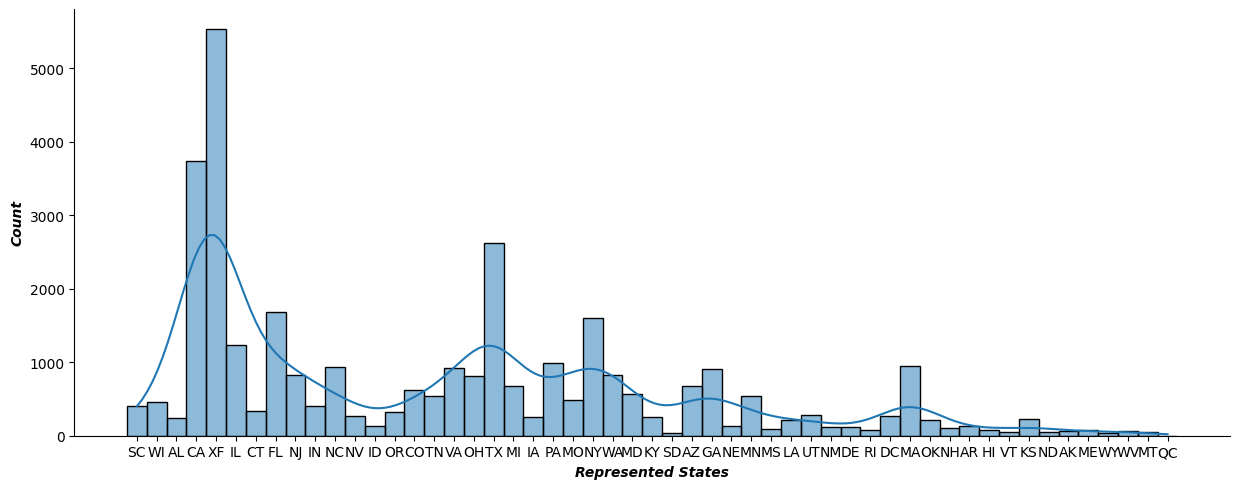

In [16]:
sn.displot(data=df, x='st_code', kde=True, aspect=2.5, binwidth=0.8)

plt.xlabel('Represented States', fontweight='bold', style='italic')
plt.ylabel('Count', fontweight='bold', style='italic')
plt.show()


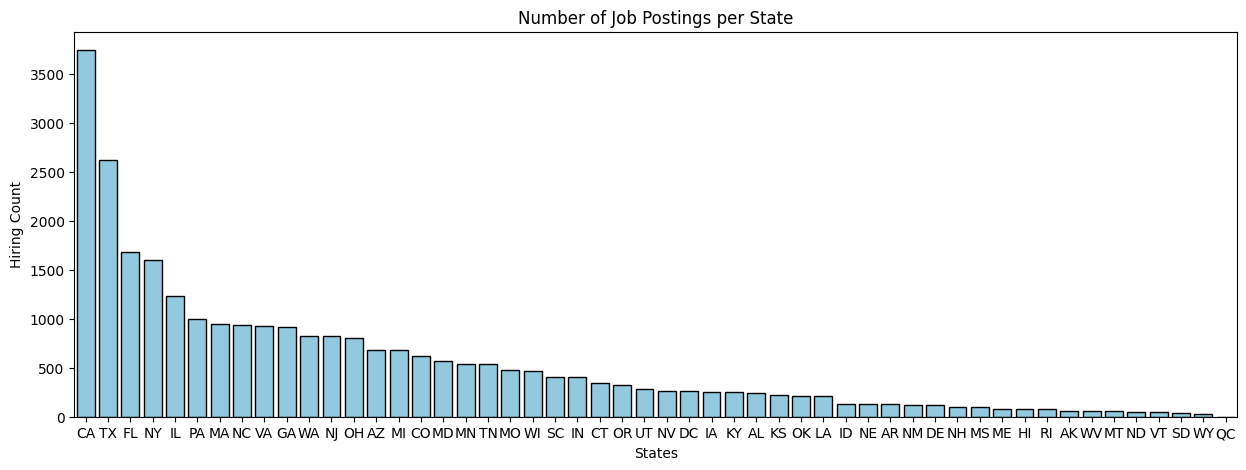

In [17]:
# prompt: I want to create a new dataframe with 2 features, one being the state names and the second being their count

states= df.groupby('st_code').size().reset_index(name='count')
states.sort_values(by='count', inplace=True, ascending = False)
states = states[states['st_code']!='XF'] #XF is not a valid state code

plt.figure(figsize = (15,5))
sn.barplot(x='st_code', y='count', data=states, color='skyblue', edgecolor='black')
plt.xlabel('States')
plt.ylabel('Hiring Count')
plt.title('Number of Job Postings per State')
plt.show()


Previously we found out that the top-paying states are New-York, California, Colorado, Washington, District of Columbia (descending order).

However out of them, only California and New-York are top employers in terms of numbers.

The other top employers are Texas and Florida, with Illinois dragging behind. All of the three have a relative solid pay of slightly above average.

The bottom employers are Alaska, West Verginia, Montana, Nevada, Vermont, South Dakota, Wyoming (descending order).

The pay there is realatively shit.

#Objectives

1. What is the relative portion of experience levels that the top/bottom state employers/payers hire?

2. What is the relationship between experience level and job views?

3. What is the correlation between the number of job postings of a state and average median salary in that state?

4. Which states get the most views? What is the view distribution?

5. Which feature has the highest correlation with the views column? What is it?
Does listing the pay (pay listed column) increase the number of views (is the correlation positive)?

6. Is there any pattern associated with 'app_is_off' (application offsite column)? What is it correlated with if anything at all?

7. Which states/companies have the highest percentage of sponsored job adds ('is_sponsored')? Does the 'is_sposored' feature correlate with anything?

8. Which features have the strongest correlation with median/maximum pay? (could serve as potential indicators in salary prediction)

## Data Cleaning & Transformation

In [18]:
#preemptively separating categorical values from continous values for future machine learning
cont = df.select_dtypes(include = ['float64','int64']).columns.tolist()
cat = df.select_dtypes(include = ['object','category', 'bool']).columns.tolist()

#just checking
print(df.dtypes)
print(cont)
print(cat)
print(len(cat)+len(cont))
print(df.shape[1])


Co_Nm               object
Co_Pg_Lstd            bool
Emp_Cnt              int64
Flw_Cnt              int64
Job_Ttl             object
Job_Desc            object
Is_Supvsr             bool
max_sal            float64
med_sal            float64
min_sal            float64
py_prd              object
py_lstd               bool
wrk_typ             object
loc                 object
st_code             object
is_remote            int64
views                int64
app_typ             object
app_is_off            bool
xp_lvl              object
domain              object
has_post_domain       bool
is_sponsored         int64
base_comp            int64
dtype: object
['Emp_Cnt', 'Flw_Cnt', 'max_sal', 'med_sal', 'min_sal', 'is_remote', 'views', 'is_sponsored', 'base_comp']
['Co_Nm', 'Co_Pg_Lstd', 'Job_Ttl', 'Job_Desc', 'Is_Supvsr', 'py_prd', 'py_lstd', 'wrk_typ', 'loc', 'st_code', 'app_typ', 'app_is_off', 'xp_lvl', 'domain', 'has_post_domain']
24
24


### Experience Level Portion Distribution on the Overall LinkedIn Market Place

In [19]:
#experience portion on the overall market
exp = df['xp_lvl'].unique()
exp_count = df['xp_lvl'].value_counts().to_dict()
exp_count_list = [(value, count) for value, count in exp_count.items()]
print(exp_count_list)

exp_percent = list(map(lambda x: (x[0], 100*x[1]/len(df)), exp_count_list))
print(exp_percent)

[('Mid-Senior level', 11258), ('Not Listed', 9181), ('Entry level', 7969), ('Associate', 2793), ('Director', 1354), ('Internship', 387), ('Executive', 304)]
[('Mid-Senior level', 33.86272032725741), ('Not Listed', 27.615352222823798), ('Entry level', 23.96980087830115), ('Associate', 8.401010647897492), ('Director', 4.072670396438669), ('Internship', 1.1640498105035193), ('Executive', 0.9143957167779583)]


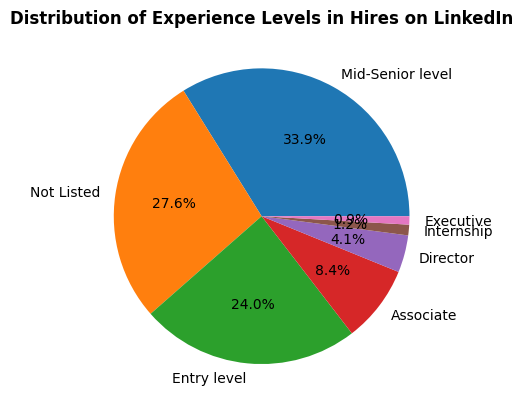

In [20]:
#experience portion on the overall marktet visualization
plt.pie(x=[i[1] for i in exp_percent], labels = [i[0] for i in exp_percent], autopct='%1.1f%%')

plt.title('Distribution of Experience Levels in Hires on LinkedIn', fontweight='bold')
plt.show()

### Experience Level Portion Distribution for each of the top 7 hiring states

The top 4 employers in terms of numbers are California, Texas, Florida and New-York.

Nothing interesting there. Not that different from the overall job market. Makes sense, since those 7 states dominate the rest in hiring, and so move the statistic in their direction.

Let's look at the bottom 4 employers.

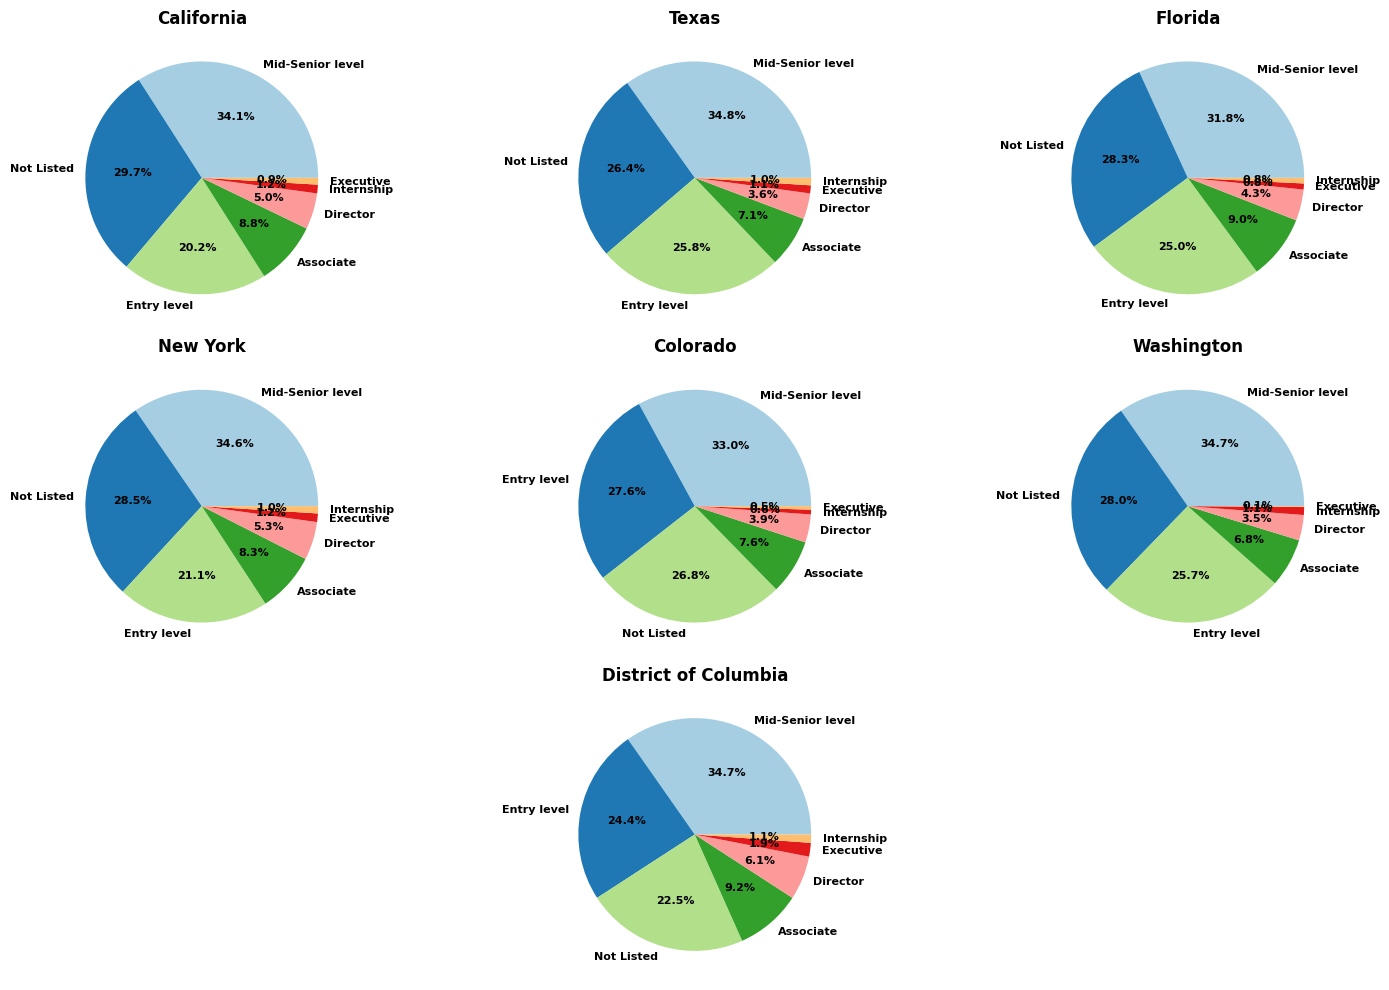

In [21]:
# Separate data for each state
ca = df[df['st_code'] == 'CA'].reset_index(drop=True)
tx = df[df['st_code'] == 'TX'].reset_index(drop=True)
fl = df[df['st_code'] == 'FL'].reset_index(drop=True)
ny = df[df['st_code'] == 'NY'].reset_index(drop=True)
co = df[df['st_code'] == 'CO'].reset_index(drop=True)
wa = df[df['st_code'] == 'WA'].reset_index(drop=True)
dc = df[df['st_code'] == 'DC'].reset_index(drop=True)

# Calculate percentages for each state
ca_exp = ca['xp_lvl'].value_counts(normalize=True) * 100
tx_exp = tx['xp_lvl'].value_counts(normalize=True) * 100
fl_exp = fl['xp_lvl'].value_counts(normalize=True) * 100
ny_exp = ny['xp_lvl'].value_counts(normalize=True) * 100
co_exp = co['xp_lvl'].value_counts(normalize=True) * 100
wa_exp = wa['xp_lvl'].value_counts(normalize=True) * 100
dc_exp = dc['xp_lvl'].value_counts(normalize=True) * 100

# Create subplots
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Plot the first pie chart
ax[0, 0].pie(ca_exp, labels=ca_exp.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'fontweight': 'bold', 'fontsize': 8,})
ax[0, 0].set_title('California', fontweight='bold')
# Plot the second pie chart
ax[0, 1].pie(tx_exp, labels=tx_exp.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'fontweight': 'bold', 'fontsize': 8,})
ax[0, 1].set_title('Texas', fontweight='bold')
# Plot the third pie chart
ax[0, 2].pie(fl_exp, labels=fl_exp.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'fontweight': 'bold', 'fontsize': 8,})
ax[0, 2].set_title('Florida', fontweight='bold')
# Plot the fourth pie chart
ax[1, 0].pie(ny_exp, labels=ny_exp.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'fontweight': 'bold', 'fontsize': 8,})
ax[1, 0].set_title('New York', fontweight='bold')

ax[1, 1].pie(co_exp, labels=co_exp.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'fontweight': 'bold', 'fontsize': 8,})
ax[1, 1].set_title('Colorado', fontweight='bold')

ax[1, 2].pie(wa_exp, labels=wa_exp.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'fontweight': 'bold', 'fontsize': 8,})
ax[1, 2].set_title('Washington', fontweight='bold')

plt.delaxes(ax[2,0])

ax[2, 1].pie(dc_exp, labels=dc_exp.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'fontweight': 'bold', 'fontsize': 8,})
ax[2, 1].set_title('District of Columbia', fontweight='bold')

plt.delaxes(ax[2,2])
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Experience Level Portion Distribution for each of the bottom 4 hiring states

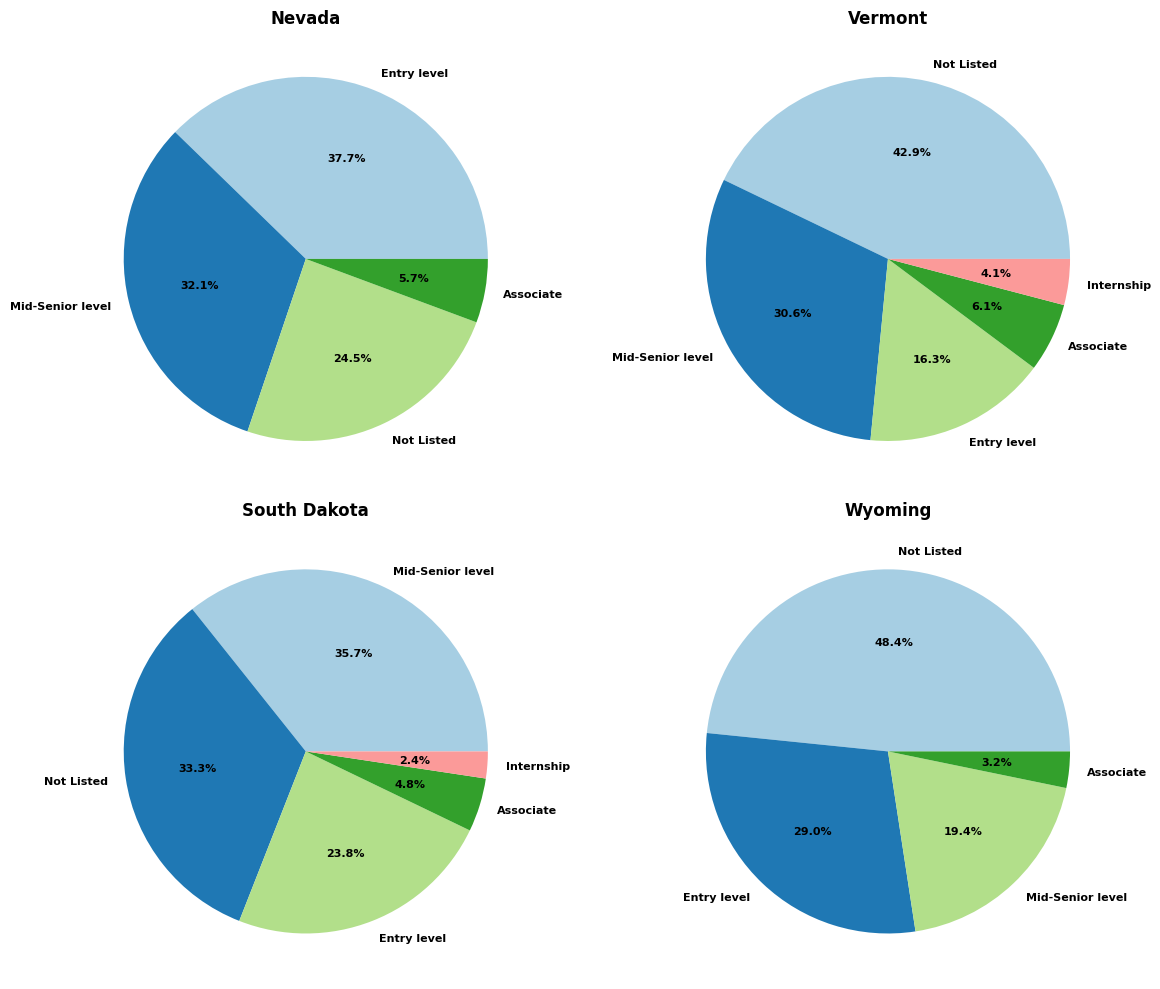

In [22]:
# Separate data for each state
nd = df[df['st_code'] == 'ND'].reset_index(drop=True)
vt = df[df['st_code'] == 'VT'].reset_index(drop=True)
sd = df[df['st_code'] == 'SD'].reset_index(drop=True)
wy = df[df['st_code'] == 'WY'].reset_index(drop=True)

# Calculate percentages for each state
nd_exp = nd['xp_lvl'].value_counts(normalize=True) * 100
vt_exp = vt['xp_lvl'].value_counts(normalize=True) * 100
sd_exp = sd['xp_lvl'].value_counts(normalize=True) * 100
wy_exp = wy['xp_lvl'].value_counts(normalize=True) * 100

# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot the first pie chart
ax[0, 0].pie(nd_exp, labels=nd_exp.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'fontweight': 'bold', 'fontsize': 8,})
ax[0, 0].set_title('Nevada', fontweight='bold')
# Plot the second pie chart
ax[0, 1].pie(vt_exp, labels=vt_exp.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'fontweight': 'bold', 'fontsize': 8,})
ax[0, 1].set_title('Vermont', fontweight='bold')
# Plot the third pie chart
ax[1, 0].pie(sd_exp, labels=sd_exp.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'fontweight': 'bold', 'fontsize': 8,})
ax[1, 0].set_title('South Dakota', fontweight='bold')
# Plot the fourth pie chart
ax[1, 1].pie(wy_exp, labels=wy_exp.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, textprops={'fontweight': 'bold', 'fontsize': 8,})
ax[1, 1].set_title('Wyoming', fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### Percentage of Interns hired in each state

In [23]:
state_intern_percentage = df.groupby('st_code')['xp_lvl'].value_counts(normalize=True).unstack().fillna(0)['Internship'] * 100
print(state_intern_percentage.sort_values(ascending=False))

st_code
AR    5.426357
VT    4.081633
OH    3.469641
KS    3.125000
NH    2.884615
MO    2.708333
WI    2.597403
SD    2.380952
IL    1.944895
PA    1.909548
MI    1.908957
OK    1.860465
NM    1.709402
AK    1.639344
NC    1.497326
CT    1.466276
GA    1.422319
VA    1.402373
RI    1.315789
MA    1.267159
HI    1.250000
IN    1.243781
CA    1.203209
DC    1.145038
WA    1.092233
MD    1.060071
UT    1.045296
TX    1.031716
NY    0.998129
NJ    0.974421
TN    0.929368
OR    0.914634
DE    0.869565
AL    0.840336
KY    0.790514
FL    0.771971
NE    0.763359
MN    0.742115
SC    0.735294
CO    0.649351
AZ    0.585652
XF    0.470248
LA    0.467290
IA    0.390625
QC    0.000000
NV    0.000000
ND    0.000000
MS    0.000000
ME    0.000000
ID    0.000000
WV    0.000000
WY    0.000000
MT    0.000000
Name: Internship, dtype: float64


Iowa hires the lowest portion of interns, roughly one third of the national percentage, while Arkansas hires the highest percentage of interns (out of all job postings in the respective states), about 5 times the national portion.

### Percentage of Entry Level being hired in each state

In [24]:
state_entry_percentage = df.groupby('st_code')['xp_lvl'].value_counts(normalize=True).unstack().fillna(0)['Entry level'] * 100
print(state_entry_percentage.sort_values(ascending=False))

st_code
LA    41.588785
WV    40.000000
AK    39.344262
KS    38.839286
ND    37.735849
MT    37.037037
KY    36.758893
IA    36.328125
SC    35.294118
UT    34.494774
OK    34.418605
HI    33.750000
ME    33.333333
MS    32.989691
AL    31.932773
TN    31.598513
OH    31.102850
MD    30.742049
AR    30.232558
ID    30.075188
NM    29.914530
NE    29.770992
OR    29.573171
MO    29.375000
NC    29.090909
WY    29.032258
NH    28.846154
WI    28.138528
MI    27.753304
CO    27.597403
IN    27.363184
VA    27.292341
MN    27.087199
AZ    27.086384
PA    26.532663
NV    26.335878
CT    26.099707
TX    25.831104
WA    25.728155
IL    25.202593
RI    25.000000
FL    25.000000
GA    24.945295
DC    24.427481
MA    24.392819
DE    24.347826
SD    23.809524
NJ    22.898904
NY    21.085465
CA    20.187166
VT    16.326531
XF    11.738108
QC     0.000000
Name: Entry level, dtype: float64


Louisiana, West Virginia, Arkansas (again), Kansas and Nevada top the list for highest relative portion of entry level job postings.
Whereas Vermont, California, New-York, New-Jersey, South Dakota have the lowest percentage of entry level job postings.

We can deduce some interesting things from the above.
It's easier for young professionals to start their careers in places like Vermont, Arkansas, Louisiana or West Verginia. Relatively speaking there are more Entry Level and Internship opportunities compared to, for instance, New-York or California, that are geared more towards hiring experienced professionals.

Vermont seems to be an interesting case. Tops the list of Internship postings and places at the bottom for Entry Level jobs. It could potentially be that the intern retention is high there. Meaning a fat portion of interns get offers for entry level full time positions after internship, so there is little need to make a job posting about it an entry level position on LinkedIn.

### Job Views vs Experience Level

In [25]:
#Lets do ANOVA
#how do the job views vary depending on the experience level
#is the difference in views (respecective view means) statistically significant?

from scipy.stats import f_oneway

result = f_oneway(df['views'][df['xp_lvl']=='Internship'],
                  df['views'][df['xp_lvl']=='Entry level'],
                  df['views'][df['xp_lvl']=='Not Listed'],
                  df['views'][df['xp_lvl']=='Mid-Senior level'],
                  df['views'][df['xp_lvl']=='Executive'],
                  df['views'][df['xp_lvl']=='Director'],
                  df['views'][df['xp_lvl']=='Associate'])
print(result)


F_onewayResult(statistic=81.38191307216516, pvalue=1.6045789068691807e-101)


The statistic above is the ratio of variance of job posting views between groups of different experience levels to the views varience within groups.
The variance between groups is 81 times higher compared to the varience within.

The p-value is the probability of having the current data given the null hypothesis is true (by random chance). Our data observations are due to random chance with probability of roughly 1.6*10^(-101). Highly unlikely and well below the usual threshhold of 0.05. So we have to reject the null hypothesis and claim that the differences in job views between experience levels are statistically significant.

There is a reason behind the difference in views based on experience level (not due to random chance).

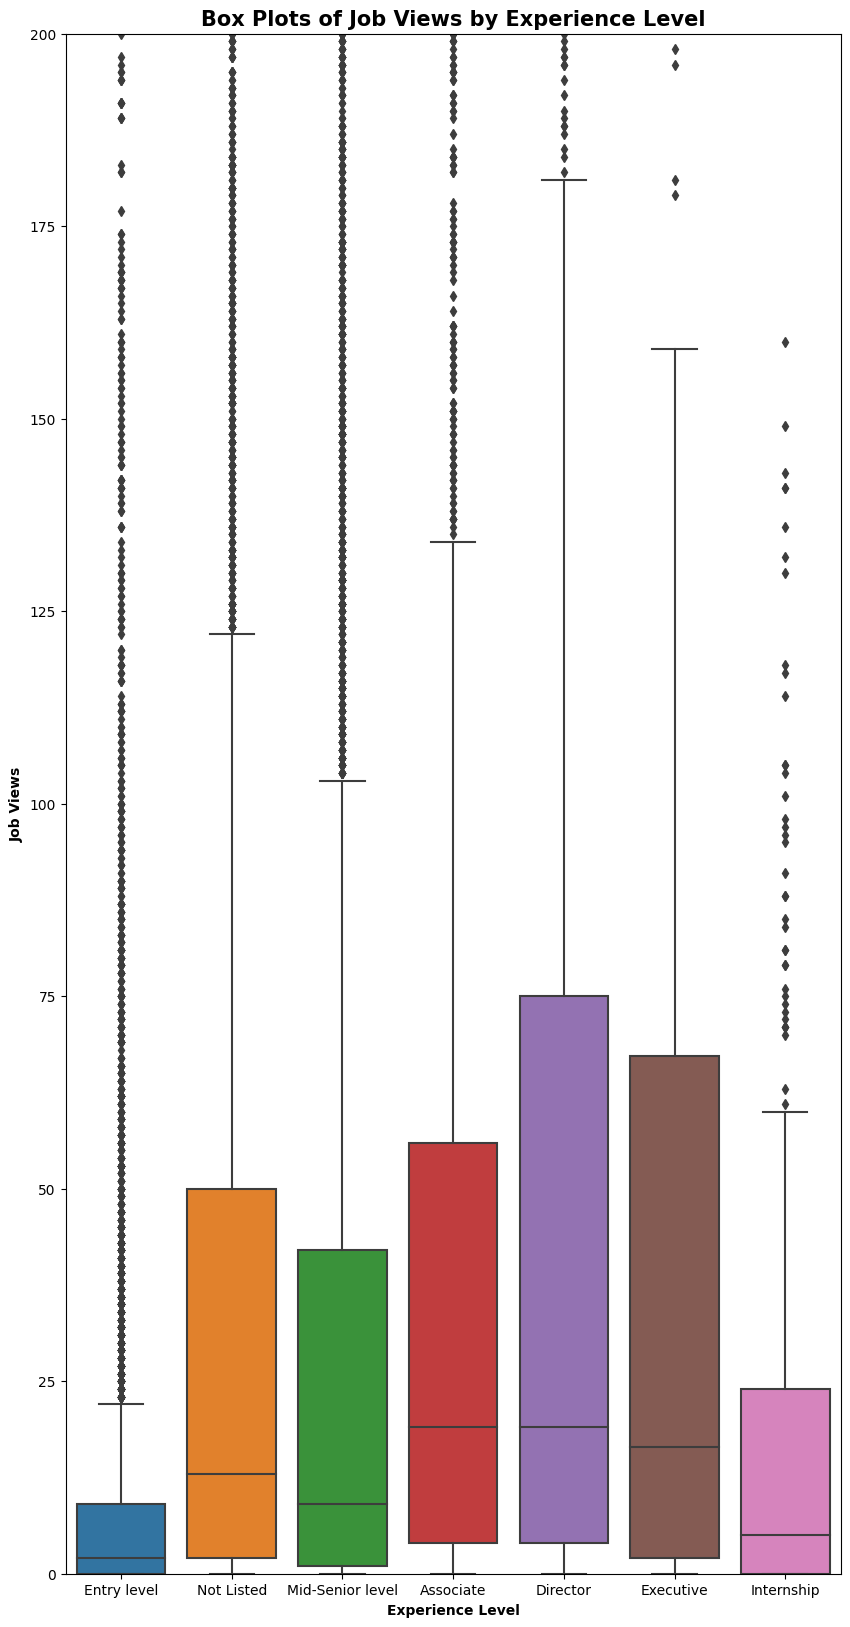

In [26]:
plt.figure(figsize=(10,20))
sn.boxplot(data=df, x='xp_lvl', y='views')
plt.ylim(0,200)
plt.xlabel('Experience Level', fontweight='bold')
plt.ylabel('Job Views', fontweight='bold')
plt.title('Box Plots of Job Views by Experience Level', fontweight='bold', fontsize=15)
plt.show()

### Correlation between Number of Job Postings and Median Salary

In [27]:
# aggregate based on state-code by taking the average of the median salary for each state and counting job postings for each state

df_new = df.groupby('st_code').agg({'xp_lvl': 'count', 'med_sal': 'mean'})
df_new.reset_index(inplace=True)
df_new.columns = ['st_code', 'job_postings', 'median_salary']
df_new.sort_values(by='job_postings', inplace=True, ascending=False)

print(df_new.head())


   st_code  job_postings  median_salary
52      XF          5529   39225.934998
4       CA          3740   50356.920679
44      TX          2617   18623.708642
9       FL          1684   17186.098456
34      NY          1603   53670.448936


In [28]:
#lets look at the correlation between number of views in a state and that states average median salary
corr_coef = np.corrcoef(df_new['job_postings'],df_new['median_salary'])[0,1]
print(corr_coef)

0.5949806445220428


The correlation (corr coeff = 0.59) between number of job postings and average median salary for each state is positively moderate/strong. This means there is a relatively hight degree high degree of linear relationship between number of views and average median salary.

### Median Salary vs Number of Job Postings

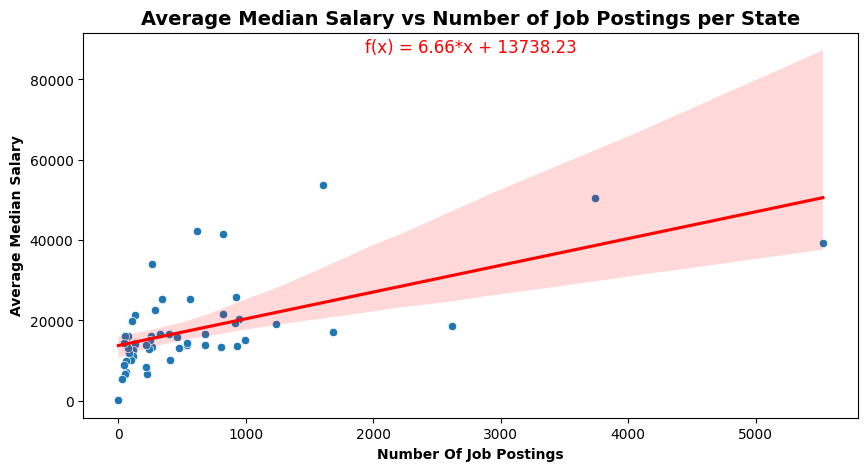

In [29]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10,5))
sn.scatterplot(x=df_new['job_postings'], y=df_new['median_salary'])
sn.regplot(x=df_new['job_postings'], y=df_new['median_salary'], scatter=False, color='red')
plt.xlabel('Number Of Job Postings', fontweight='bold')
plt.ylabel('Average Median Salary', fontweight='bold')

model = LinearRegression()
X = df_new['job_postings'].values.reshape(-1,1)
y = df_new['median_salary'].values
model.fit(X,y)

slope = model.coef_[0]
intercept = model.intercept_

equation = f'f(x) = {slope:.2f}*x + {intercept:.2f}'
plt.annotate(equation, xy=(0.5,0.95), xycoords='axes fraction', ha='center', fontsize=12, color='red')
plt.title('Average Median Salary vs Number of Job Postings per State', fontweight='bold', fontsize=14)
plt.show()

The strong positive correaltion between number of job postings per state and the average median salary for each state is reflected in the positive slope of the linear regression line.

This makes sense. If there are a lot of job postings in a state, it indicates a compettive job market place. To hire talent the employers have to outcompete other companies that offer the employee an alternative compensation package. Wage amount is one of the main competitiion grounds for hiring skilled labor. So if a lot of employers compete, the median salary will naturally increase as a result of this competition.

Whereas in other states, where there are fewer job postings and hence less competition among employers to hire skilled labor, the median compensation package is less inflated.
There is likely also less demand for advanced jobs, meaning a smalller amount of skilled workers that would want to fill those positions compared to states with greater, denser populations like California or New-York.

### Views Number Distribution per State

st_code
CA    176297
NY     89450
TX     81832
FL     45294
IL     43378
Name: views, dtype: int64


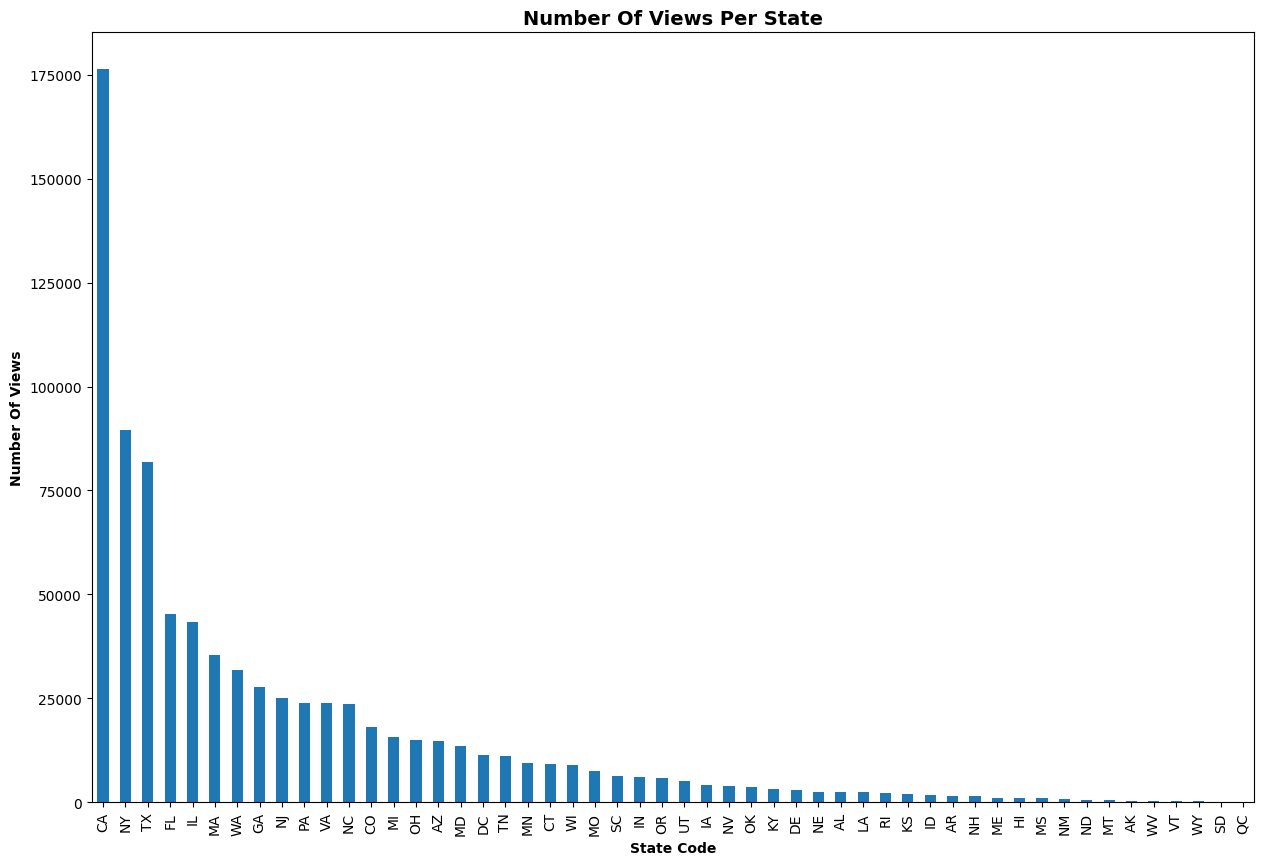

In [30]:
#plot the distribution of views per state in descending order in a bar chart

df_view_count = df.groupby('st_code')['views'].sum().sort_values(ascending=False)
df_view_count = df_view_count[df_view_count.index != 'XF']
print(df_view_count.head())
df_view_count.plot(kind='bar', figsize=(15,10))
plt.xlabel('State Code', fontweight='bold')
plt.ylabel('Number Of Views', fontweight='bold')
plt.title('Number Of Views Per State', fontweight='bold', fontsize=14)
plt.show()


### Correlation between Views on a Job Posting and Job Posting Features

* Which feature has the highest correlation with the views column?
* What is it ?
* Does listing the pay (pay listed column) increase the number of views (is the correlation positive)?

In [31]:
#views is a numerical variable (integers)
#to find the correlations of all other features with the views column we need to compute correlation for each pair (some feature, views)
#the features have different data types, some are floats, others are objects
#depending on the type we will need to use a different type of correlation
#store the correlations somewhere and get the biggest one

In [32]:
#there are ints, floats, bools, objects --> 4 different objects
#some columns won't be relevant here, like Co_Nm (company name), Job_Ttl, Job_Desc, loc, views, app_typ, domain
#that means we will keep all other features for correlation analysis with the views column

views_items = ['Co_Pg_Lstd','Emp_Cnt','Flw_Cnt','Is_Supvsr','max_sal','med_sal','min_sal','py_prd','py_lstd','wrk_typ','st_code','is_remote','app_typ','app_is_off','xp_lvl', 'is_sponsored', 'base_comp']

views_df = df[views_items].copy() #all required features for correlation analysis with the views variable
print(views_df.columns)
print(views_df.dtypes)

Index(['Co_Pg_Lstd', 'Emp_Cnt', 'Flw_Cnt', 'Is_Supvsr', 'max_sal', 'med_sal',
       'min_sal', 'py_prd', 'py_lstd', 'wrk_typ', 'st_code', 'is_remote',
       'app_typ', 'app_is_off', 'xp_lvl', 'is_sponsored', 'base_comp'],
      dtype='object')
Co_Pg_Lstd         bool
Emp_Cnt           int64
Flw_Cnt           int64
Is_Supvsr          bool
max_sal         float64
med_sal         float64
min_sal         float64
py_prd           object
py_lstd            bool
wrk_typ          object
st_code          object
is_remote         int64
app_typ          object
app_is_off         bool
xp_lvl           object
is_sponsored      int64
base_comp         int64
dtype: object


In [33]:
#calculates correlation values between the views feature and each of the selected job posting features
#returns dictionary with correlation values
def corr_fun(target, features):
  '''
  Parameters:
  - target --> must be a pandas Series (one desired column in the dataframe)
    all other features will be correlated with it

  - features --> must be a pandas Dataframe that contaisn only the features desired for testing their correlation with the target variable
  '''

  from sklearn.preprocessing import LabelEncoder

  corr_vals = {}

  for c in features.columns:

    if features[c].dtype=='object':

      label_enc = LabelEncoder()
      encoded_feature = label_enc.fit_transform(features[c])
      encoded_feature_series = pd.Series(encoded_feature, name=c)

      corr_val = encoded_feature_series.corr(target)
      corr_vals[c] = corr_val

    else:

      corr_val = target.corr(features[c])
      corr_vals[c] = corr_val

  return corr_vals

In [34]:
views_corrs = corr_fun(df['views'], views_df)
print(views_corrs)

{'Co_Pg_Lstd': 0.01158459376505787, 'Emp_Cnt': -0.003110645388638912, 'Flw_Cnt': 0.036784497986100284, 'Is_Supvsr': 0.05293284482178125, 'max_sal': 0.11032427876209043, 'med_sal': 0.11423232232893252, 'min_sal': 0.11640121148394283, 'py_prd': 0.09389974934585472, 'py_lstd': 0.063902111188293, 'wrk_typ': -0.07979692926158541, 'st_code': 0.14850042740596003, 'is_remote': 0.343757292541427, 'app_typ': -0.10092352785380057, 'app_is_off': -0.16083036045281837, 'xp_lvl': 0.02605149003880326, 'is_sponsored': 0.07238275926509946, 'base_comp': 0.06160418523176806}


In [35]:
view_corr_val = views_corrs.values()
max_view_corr = max(list(view_corr_val))

for item, value in views_corrs.items():
  if value == max_view_corr:
    print(f'The feature that has the highest correlation with the view count on a given job posting is "{item}". The correlation is positive: {value}')


The feature that has the highest correlation with the view count on a given job posting is "is_remote". The correlation is positive: 0.343757292541427


#### Job Posting Feature Correlations to Number of Views

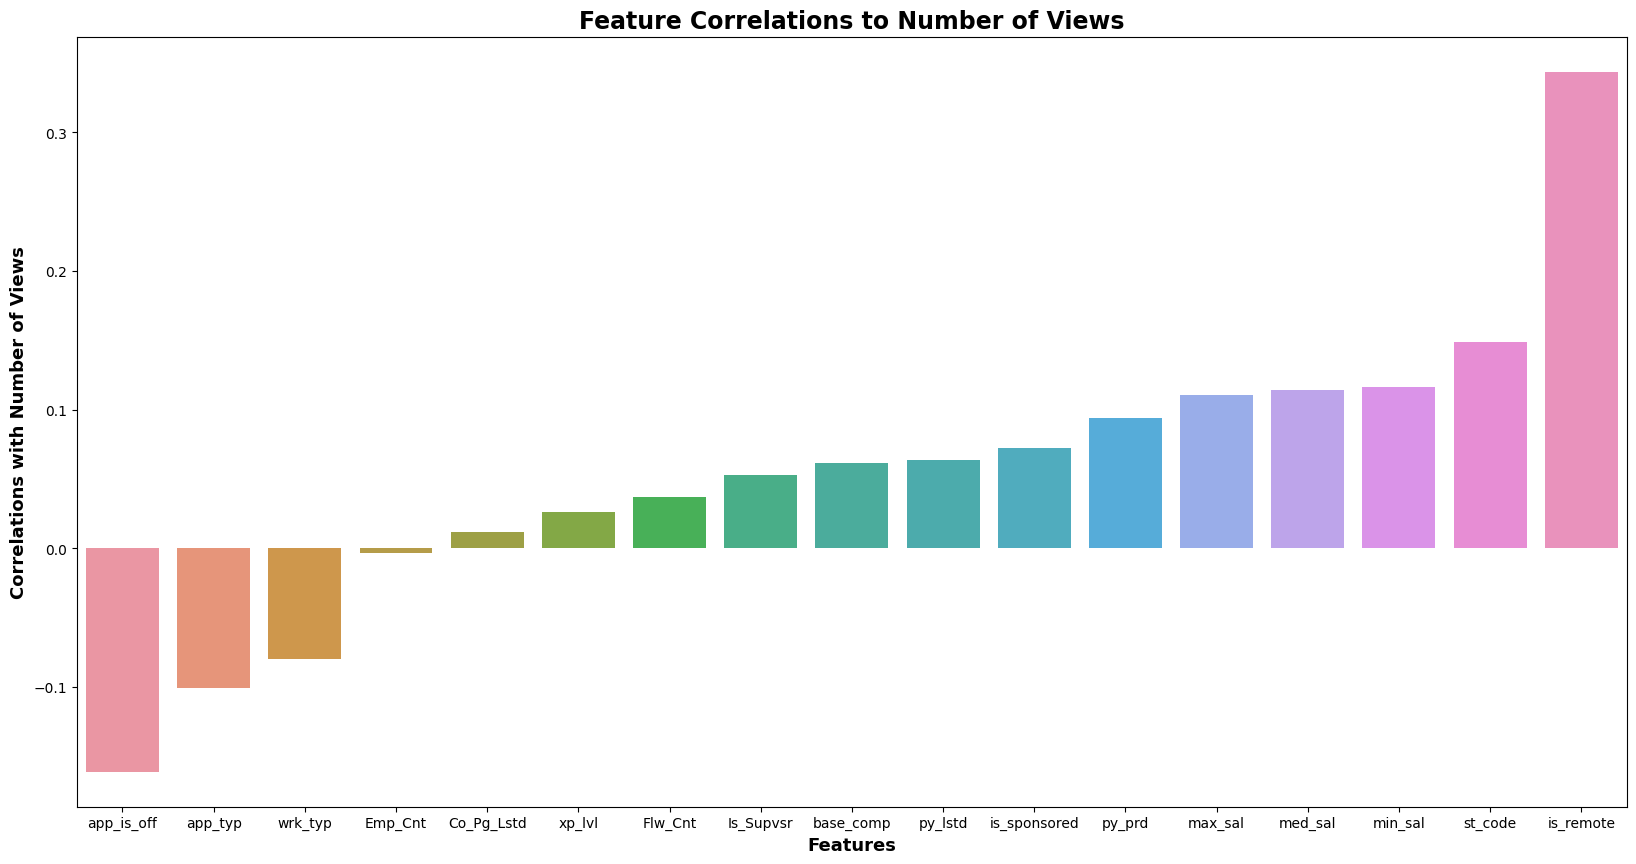

In [36]:
corr_df = pd.DataFrame(list(views_corrs.items()), columns = ['Features', 'Correlations'])
corr_df = corr_df.sort_values(by='Correlations', ascending=True)
plt.figure(figsize=(20,10))
sn.barplot(data = corr_df, x='Features', y='Correlations')
plt.title('Feature Correlations to Number of Views', fontweight='bold', fontsize=17)
plt.xlabel('Features', fontsize=13, fontweight='bold')
plt.ylabel('Correlations with Number of Views', fontsize=13, fontweight='bold')
plt.show()


### Postings to Views ratio (relative measurement for market saturation/competition)

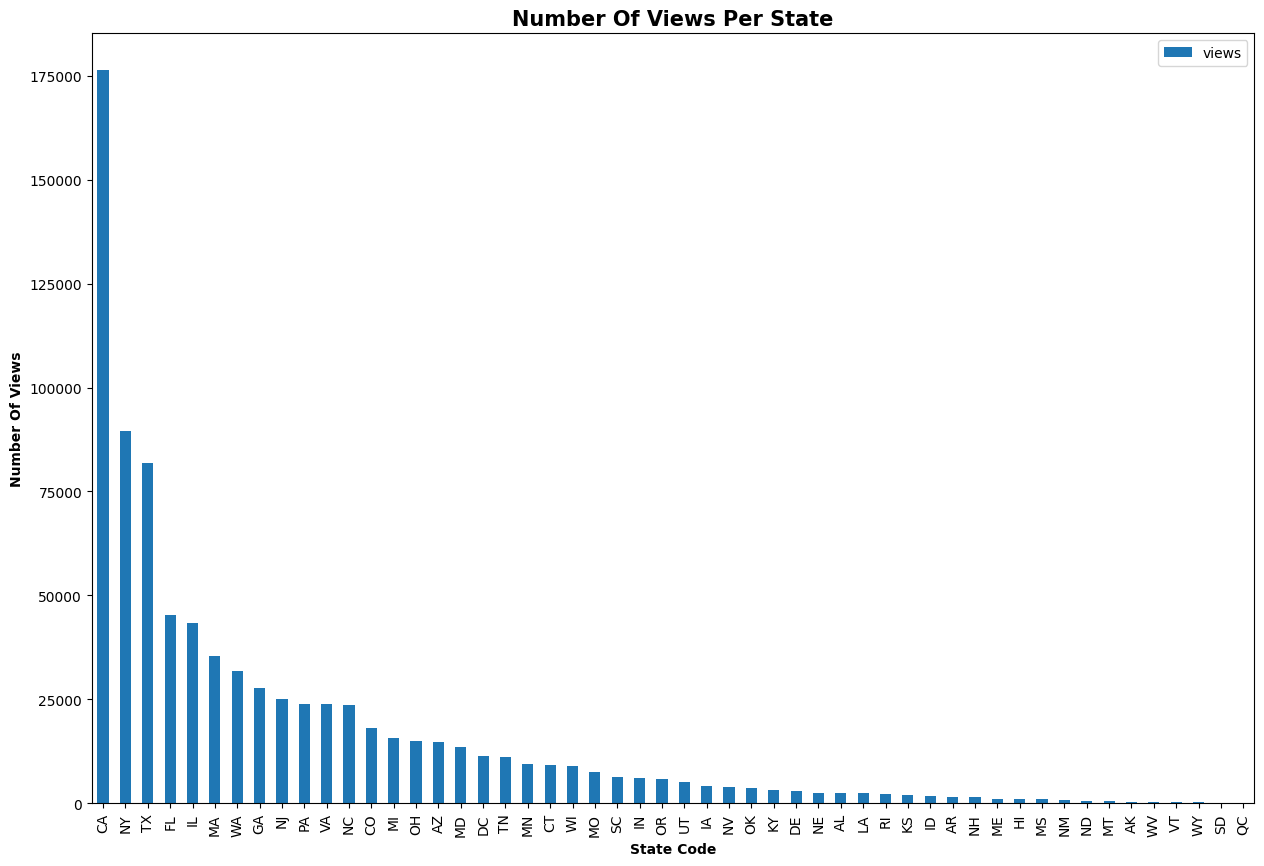

In [37]:


df_view_count = df.groupby('st_code').agg({'views':'sum'}).sort_values(by='views',ascending=False)
df_view_count = df_view_count[df_view_count.index != 'XF']
df_view_count.plot(kind='bar', figsize=(15,10))
plt.xlabel('State Code', fontweight='bold')
plt.ylabel('Number Of Views', fontweight='bold')
plt.title('Number Of Views Per State', fontweight='bold', fontsize=15)
plt.show()


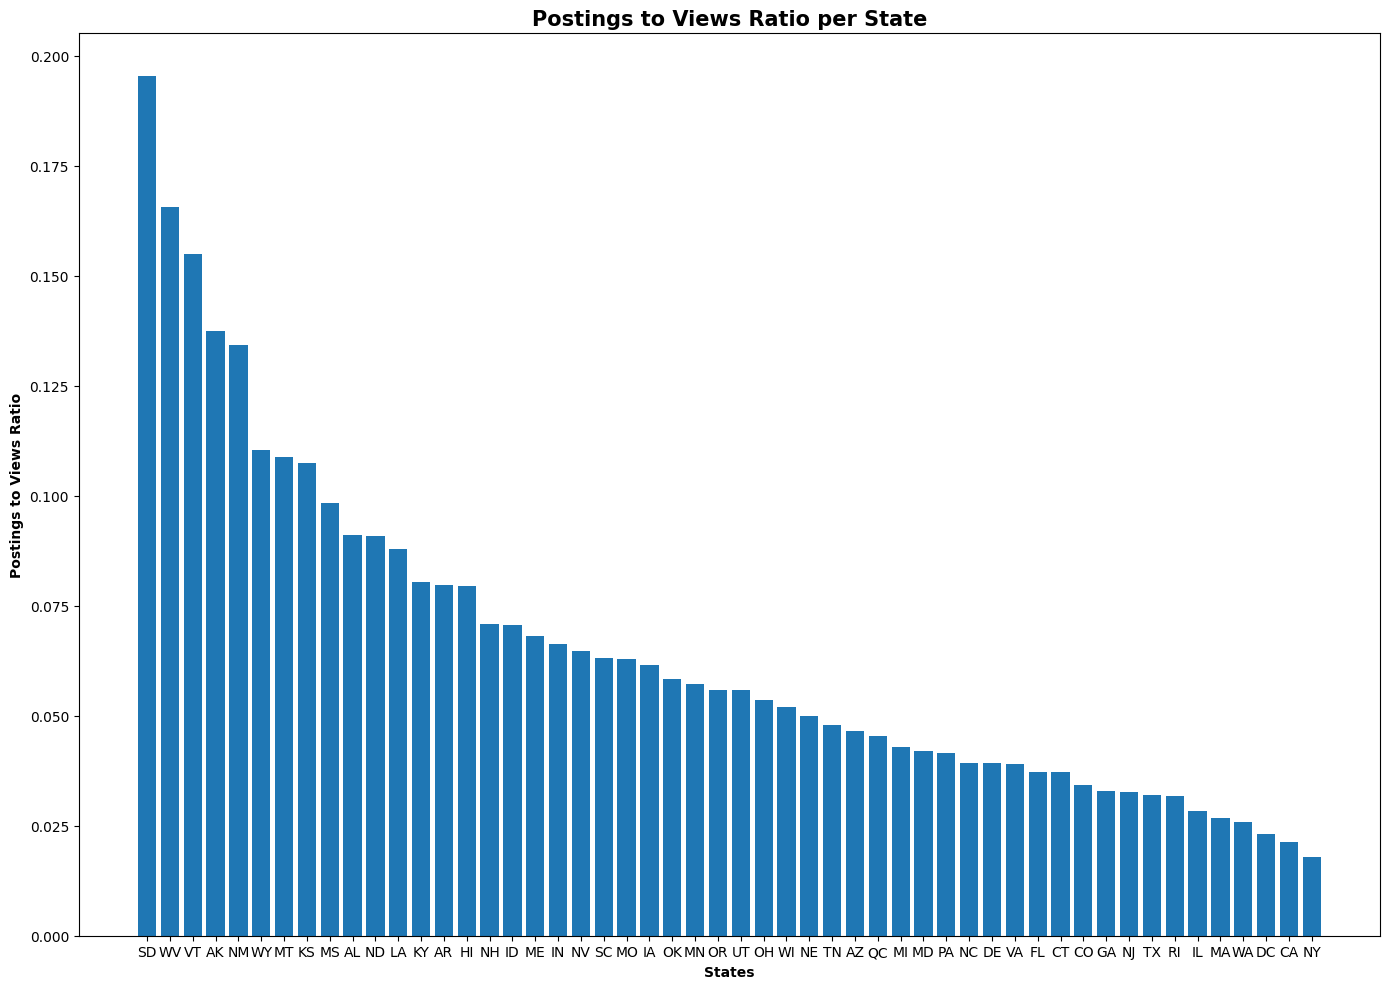

In [38]:
grouped = df.groupby('st_code').agg({'views':'sum','st_code':'count'})
grouped = grouped[grouped.index != 'XF']

grouped['postings_to_views_ratio'] = grouped['st_code']/grouped['views']

grouped.sort_values(by='postings_to_views_ratio', inplace=True, ascending=False)

plt.figure(figsize = (14,10))
plt.bar(grouped.index, grouped['postings_to_views_ratio'])
plt.xlabel('States', fontweight='bold')
plt.ylabel('Postings to Views Ratio', fontweight='bold')
plt.title('Postings to Views Ratio per State', fontweight='bold',fontsize='15')
plt.tight_layout()
plt.show()

The greater the total number of views for all job postings in some state, the more competition there is for landing a job (on average). The job market place is saturated.

And vice versa.

Thus the higher the Postings to Views Ratio (#Postings/#Views), the easier it is to land a job compared to other states that have a lower #Postings/#Views.

Even though, New York and California have the most job postings and have the highest median/max salaries, they also have the greatest number of views, meaning fierce competition for a job spot.

Whereas places like, South Dakota, West Virginia, Vermont or Alaska might not have as many job postings, but the view count is also low. So the competition is more relaxed.



Vermont seems like a dream place for college students.
It has the second highest percentage of internship postings out of all job postings in Vermont compared to other states.
And the Postings to Views Ratio is quite high, comparatively little competition.

West Virginia and Alaska are great candidates for Entry Level Positions. Again the Postings to Views Ratio is pretty high, but they are 2nd and 3rd in terms of percentage of local Job Postings, respectively. Meaning there is a relatively high demand for beginning professionals compared to other states.

### Which Job Posting Features have the strongest correlation with Salary?

In [39]:
med_sal_items = ['Co_Pg_Lstd','Emp_Cnt','Flw_Cnt','Is_Supvsr','max_sal','min_sal','py_prd','py_lstd','wrk_typ','st_code','is_remote','views','app_typ','app_is_off','xp_lvl', 'is_sponsored', 'base_comp']
max_sal_items = ['Co_Pg_Lstd','Emp_Cnt','Flw_Cnt','Is_Supvsr','med_sal','min_sal','py_prd','py_lstd','wrk_typ','st_code','is_remote','views','app_typ','app_is_off','xp_lvl', 'is_sponsored', 'base_comp']

med_sal_df = df[med_sal_items].copy()
max_sal_df = df[max_sal_items].copy()

med_sal_corrs = corr_fun(df['med_sal'], med_sal_df)
max_sal_corrs = corr_fun(df['max_sal'], max_sal_df)

print(med_sal_corrs)
print(max_sal_corrs)

{'Co_Pg_Lstd': 0.0183613337242014, 'Emp_Cnt': 0.08312869080535182, 'Flw_Cnt': 0.1786171279641085, 'Is_Supvsr': 0.17670723663385213, 'max_sal': 0.9914197446483357, 'min_sal': 0.983275692644372, 'py_prd': 0.7813910151091914, 'py_lstd': 0.5720492881985881, 'wrk_typ': -0.06767127056696152, 'st_code': 0.004197990192637559, 'is_remote': 0.09196354579174187, 'views': 0.11423232232893252, 'app_typ': -0.04538801190525487, 'app_is_off': -0.04570915292687691, 'xp_lvl': 0.036294606591701244, 'is_sponsored': 0.029926552185984397, 'base_comp': 0.5795975437848188}
{'Co_Pg_Lstd': 0.01907091223114225, 'Emp_Cnt': 0.09672218117181453, 'Flw_Cnt': 0.1914623476785429, 'Is_Supvsr': 0.17111980581097141, 'med_sal': 0.9914197446483358, 'min_sal': 0.9510323497941331, 'py_prd': 0.7685354851633451, 'py_lstd': 0.562601968187869, 'wrk_typ': -0.06630993433106935, 'st_code': 0.004077153284632663, 'is_remote': 0.09559580962664488, 'views': 0.11032427876209043, 'app_typ': -0.0417764569875465, 'app_is_off': -0.0354876474

#### Feature Correlations to Median Salary

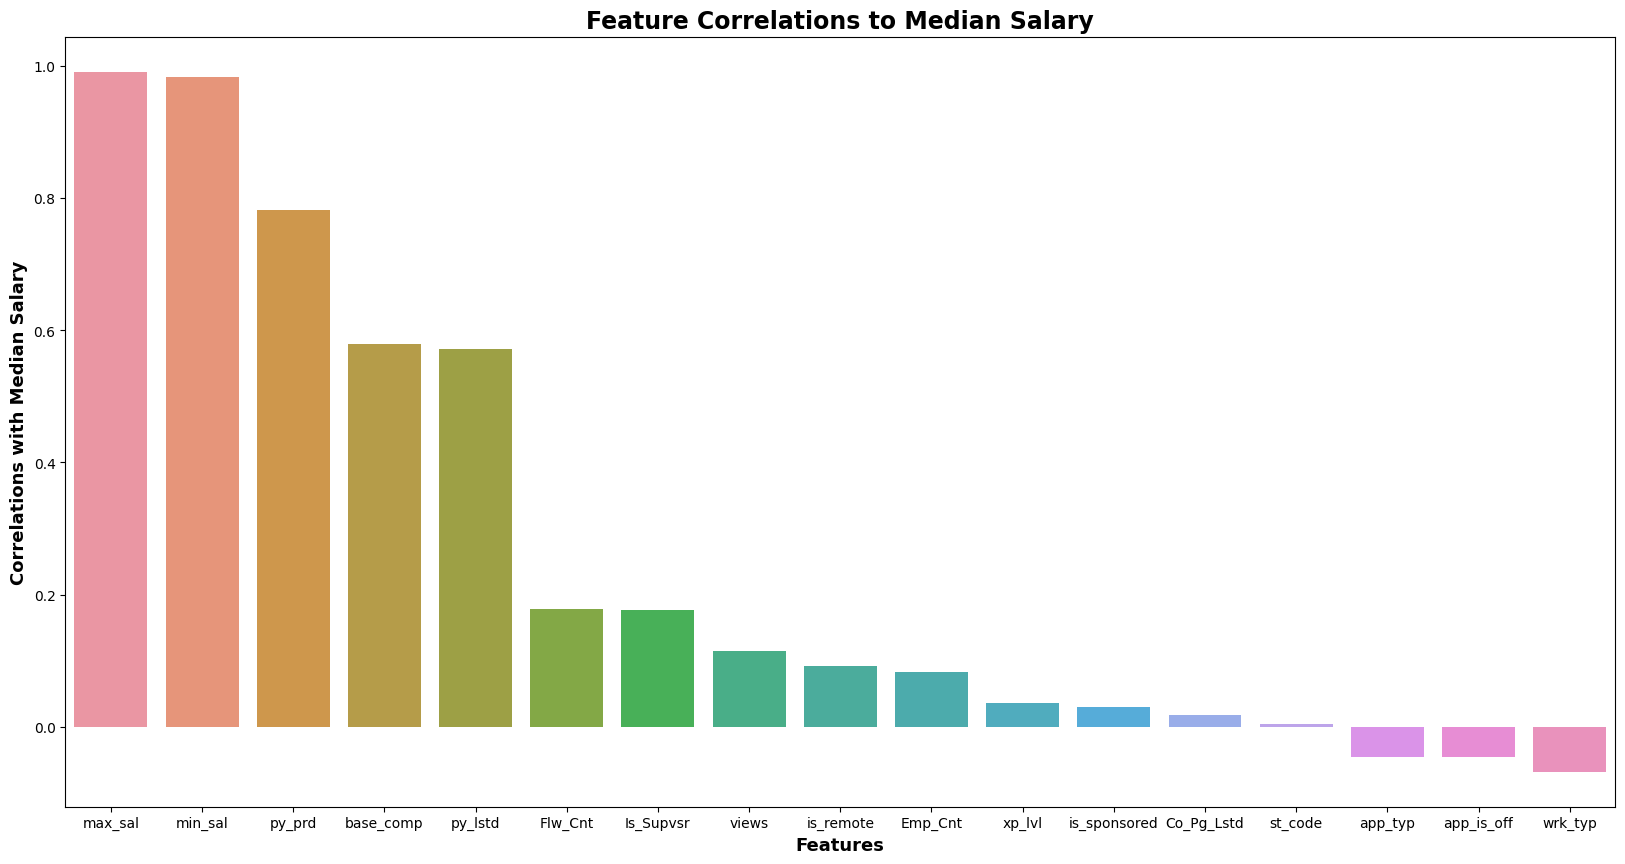

In [40]:
corr_df = pd.DataFrame(list(med_sal_corrs.items()), columns = ['Features', 'Correlations'])
corr_df = corr_df.sort_values(by='Correlations', ascending=False)
plt.figure(figsize=(20,10))
sn.barplot(data = corr_df, x='Features', y='Correlations')
plt.title('Feature Correlations to Median Salary', fontweight='bold', fontsize=17)
plt.xlabel('Features', fontsize=13, fontweight='bold')
plt.ylabel('Correlations with Median Salary', fontsize=13, fontweight='bold')
plt.show()

#### Feature Correlations to Maximum Salary

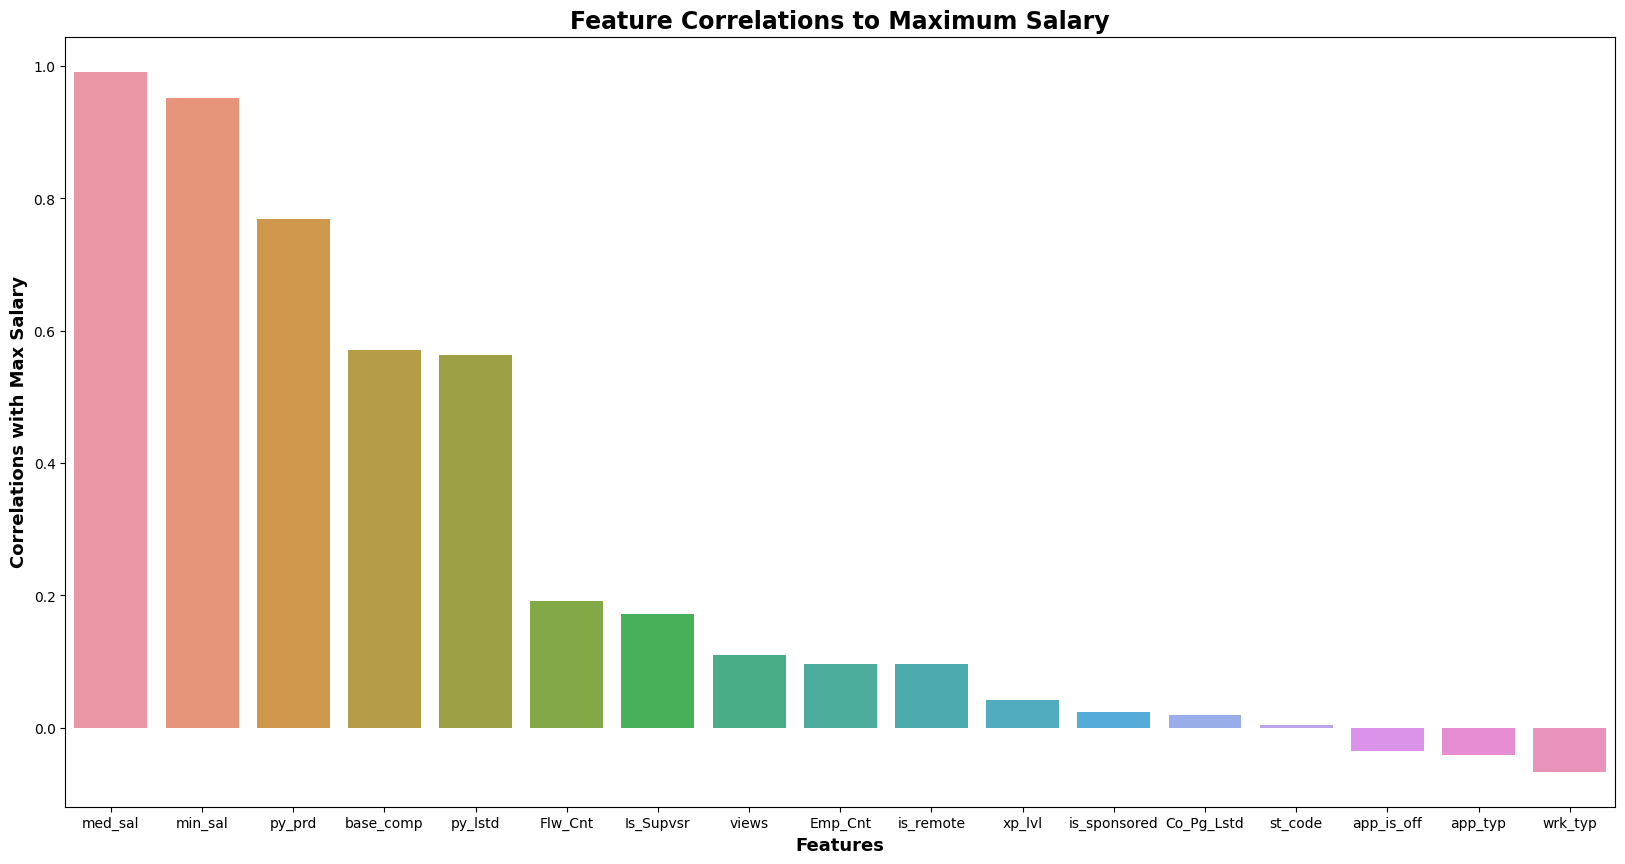

In [41]:
corr_df = pd.DataFrame(list(max_sal_corrs.items()), columns = ['Features', 'Correlations'])
corr_df = corr_df.sort_values(by='Correlations', ascending=False)
plt.figure(figsize=(20,10))
sn.barplot(data = corr_df, x='Features', y='Correlations')
plt.title('Feature Correlations to Maximum Salary', fontweight='bold', fontsize=17)
plt.xlabel('Features', fontsize=13, fontweight='bold')
plt.ylabel('Correlations with Max Salary', fontsize=13, fontweight='bold')
plt.show()

# Predictions (Machine Learning)



## What do I want to predict using machine learning?

* Predict the median salary (cont. feature) based on the given features
* Predict the number of views (discrete feature) on job postings
* Predict the employee count (discrete feature) given the provided features
* Predict the experience level (categorical ordinal feature) that is being sought





## Predict the median salary with Linear Regression

In [42]:
#feature types
df.dtypes

Co_Nm               object
Co_Pg_Lstd            bool
Emp_Cnt              int64
Flw_Cnt              int64
Job_Ttl             object
Job_Desc            object
Is_Supvsr             bool
max_sal            float64
med_sal            float64
min_sal            float64
py_prd              object
py_lstd               bool
wrk_typ             object
loc                 object
st_code             object
is_remote            int64
views                int64
app_typ             object
app_is_off            bool
xp_lvl              object
domain              object
has_post_domain       bool
is_sponsored         int64
base_comp            int64
dtype: object

###Picking features for Linear Regression prediction of Median Salary

In [43]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

med_sal = ['Emp_Cnt','Flw_Cnt', 'Is_Supvsr','py_prd','py_lstd','wrk_typ','st_code','is_remote','views','app_typ','app_is_off','xp_lvl','has_post_domain','is_sponsored','base_comp']
med_sal_features = df[med_sal].copy()
med_sal_target = df['med_sal'].copy()

nominal_features = med_sal_features[['st_code']]
ordinal_features = med_sal_features[['py_prd','wrk_typ','app_typ','xp_lvl']]

print(med_sal_features.isna().sum())
print(med_sal_target.isna().sum())


Emp_Cnt            0
Flw_Cnt            0
Is_Supvsr          0
py_prd             0
py_lstd            0
wrk_typ            0
st_code            0
is_remote          0
views              0
app_typ            0
app_is_off         0
xp_lvl             0
has_post_domain    0
is_sponsored       0
base_comp          0
dtype: int64
0


### Encoding the Categorical Features

In [44]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# nominal feature encoding for linear regression (one-hot-encoding)
encoder = OneHotEncoder(sparse=False)
nominal_encoded = encoder.fit_transform(nominal_features)

#get the new names for the one-hot encoded column
encoded_names = encoder.get_feature_names_out(['st_code'])

# Create a DataFrame from the one-hot encoded array with proper column names
nominal_encoded_df = pd.DataFrame(nominal_encoded, columns=encoded_names)

# Add the one-hot encoded features to the med_sal_features DataFrame
med_sal_features = pd.concat([med_sal_features, nominal_encoded_df], axis=1)

# Remove the original nominal feature column
med_sal_features.drop(['st_code'], axis=1, inplace=True)


#ordinal feature encoding (label encoding)
label_enc = LabelEncoder()
for column in ordinal_features.columns:
  med_sal_features[column] = label_enc.fit_transform(med_sal_features[column])

med_sal_features.columns

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Index(['Emp_Cnt', 'Flw_Cnt', 'Is_Supvsr', 'py_prd', 'py_lstd', 'wrk_typ',
       'is_remote', 'views', 'app_typ', 'app_is_off', 'xp_lvl',
       'has_post_domain', 'is_sponsored', 'base_comp', 'st_code_AK',
       'st_code_AL', 'st_code_AR', 'st_code_AZ', 'st_code_CA', 'st_code_CO',
       'st_code_CT', 'st_code_DC', 'st_code_DE', 'st_code_FL', 'st_code_GA',
       'st_code_HI', 'st_code_IA', 'st_code_ID', 'st_code_IL', 'st_code_IN',
       'st_code_KS', 'st_code_KY', 'st_code_LA', 'st_code_MA', 'st_code_MD',
       'st_code_ME', 'st_code_MI', 'st_code_MN', 'st_code_MO', 'st_code_MS',
       'st_code_MT', 'st_code_NC', 'st_code_ND', 'st_code_NE', 'st_code_NH',
       'st_code_NJ', 'st_code_NM', 'st_code_NV', 'st_code_NY', 'st_code_OH',
       'st_code_OK', 'st_code_OR', 'st_code_PA', 'st_code_QC', 'st_code_RI',
       'st_code_SC', 'st_code_SD', 'st_code_TN', 'st_code_TX', 'st_code_UT',
       'st_code_VA', 'st_code_VT', 'st_code_WA', 'st_code_WI', 'st_code_WV',
       'st_code_WY', 's

### Train Linear Regression

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = med_sal_features
y = med_sal_target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69)

#create the Linear Regression instance
linreg_model = LinearRegression()
#train the Linear Regression Model
linreg_model.fit(X_train, y_train)
#Make predictions with the model
linreg_predict = linreg_model.predict(X_test)

#Assess accuracy of the model via mean-squared error and root mean squared error
mse = mean_squared_error(y_test, linreg_predict)

print(f'The mean squared error is {mse}')

rmse = np.sqrt(mse)

print(f'The root mean squared error is {rmse}')


The mean squared error is 1000452855.5917977
The root mean squared error is 31629.9360668307


In [46]:
lin_coef = linreg_model.coef_
bias = linreg_model.intercept_

print(f'Linear Combination Coefficients are --> {lin_coef}')
print(f'The bias term (y-intercept) is --> {bias}')

Linear Combination Coefficients are --> [-7.43037634e-02  2.95702490e-03  7.89254816e+03  1.83322711e+04
 -3.64571882e+04 -1.71930925e+01  4.17028773e+03  1.02669482e+01
 -1.19761158e+03  1.42954236e+03 -5.59290372e+01  3.54283708e+03
 -1.35062952e+03  7.22471032e+04 -4.51849275e+03 -2.84008787e+03
 -1.64655492e+03 -3.13536845e+02  7.68960730e+03 -2.09075132e+03
  4.69778157e+03  5.57532275e+03 -6.31594225e+02 -2.75797089e+01
 -5.01477441e+02  1.01692856e+03  2.36311447e+03  3.15005671e+03
  1.77582129e+03 -2.67927965e+03 -6.91502008e+02 -5.67854243e+02
 -3.50661278e+02  3.11162321e+03  1.99801248e+03 -7.31617061e+03
  9.20048686e+02 -1.77611600e+03  5.20693279e+02 -2.35464254e+03
 -3.55359175e+02 -5.03422399e+02 -3.75176388e+03 -5.54691085e+03
  2.10645752e+03 -1.27827570e+02 -2.69339028e+03 -1.70420251e+02
  4.40572454e+03  5.79917410e+02 -2.78431296e+03 -7.22527771e+02
  1.22537406e+03 -3.63797881e-12 -3.07922340e+03 -8.50054832e+02
 -5.96070494e+03  1.52740960e+02  1.94676957e+03  

### Top 5 influential features for Median Salary predictions using Linear Regression

In [47]:
coef_df = pd.DataFrame({'Feature':med_sal_features.columns, 'Coefficients':lin_coef})
coef_df['Absolute Coefficient'] = coef_df['Coefficients'].abs()
coef_df.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)

print(f'Top 5 Contributing Coefficients that influence Median Salary the most in Linear Regression: ')
print(coef_df.head(5))

Top 5 Contributing Coefficients that influence Median Salary the most in Linear Regression: 
       Feature  Coefficients  Absolute Coefficient
13   base_comp  72247.103209          72247.103209
4      py_lstd -36457.188160          36457.188160
3       py_prd  18332.271122          18332.271122
2    Is_Supvsr   7892.548159           7892.548159
18  st_code_CA   7689.607300           7689.607300


## Random Forest Median Salary Prediction

### Train Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

X = med_sal_features.copy()
y = df['med_sal'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69)

rf_model = RandomForestRegressor(random_state=69)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)

print('RF mse:', mse)
print('RF rmse:', rmse)


RF mse: 720602396.0629739
RF rmse: 26844.038370986094


### Feature Importance

Little bit better than linear regression for the same set of features.
Lets look at the feature importance.

In [49]:
rf_feat_imp = rf_model.feature_importances_

feat_imp_df = pd.DataFrame({'Feature':med_sal_features.columns, 'Importance':rf_feat_imp})

feat_imp_df.sort_values(by='Importance',ascending=False, inplace=True)

print(feat_imp_df)


       Feature    Importance
3       py_prd  7.074690e-01
1      Flw_Cnt  7.562135e-02
0      Emp_Cnt  5.386516e-02
7        views  4.901352e-02
10      xp_lvl  2.208417e-02
..         ...           ...
56  st_code_SD  2.993989e-06
65  st_code_WY  1.730048e-06
14  st_code_AK  5.792894e-07
4      py_lstd  0.000000e+00
53  st_code_QC  0.000000e+00

[67 rows x 2 columns]


From above we know that the top 5 important features for the random forrest are all positively correlated with median salary.

The 'max_sal' and 'min_sal' features where deliberately excluded from both learning algos, due to their high correlation with median salary. Their inclusion in the training feature set would diminish the usefullness of the learning algos. If max salary and/or min salary are given on a job posting, then the person has a rough idea of where the median would be, without the help of any machine learning algo.     

### Train RF again (additional features--> min salary and max salary) + Feature Importance

Let us see if the random forest algo will be more accurate if we include the max and min salary in the training dataset.

In [50]:
X = pd.concat([med_sal_features, df[['max_sal','min_sal']]], axis=1)
y = df['med_sal']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69)

rf_model = RandomForestRegressor(random_state=69)
rf_model.fit(X_train, y_train)

predict = rf_model.predict(X_test)

mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)

rf_feat_imp = rf_model.feature_importances_

feat_imp_df = pd.DataFrame({'Feature':X.columns, 'Importance':rf_feat_imp})

feat_imp_df.sort_values(by='Importance',ascending=False, inplace=True)


print('RF mse:', mse)
print('RF rmse:', rmse)

print(feat_imp_df)

RF mse: 9624569.307955002
RF rmse: 3102.3489984131384
       Feature    Importance
67     max_sal  9.751309e-01
68     min_sal  2.406300e-02
8      app_typ  1.885105e-04
0      Emp_Cnt  1.053328e-04
1      Flw_Cnt  9.719222e-05
..         ...           ...
13   base_comp  2.623644e-10
14  st_code_AK  1.569491e-11
65  st_code_WY  5.475035e-16
53  st_code_QC  0.000000e+00
4      py_lstd  0.000000e+00

[69 rows x 2 columns]


About 9 times more accurate compared to the same Random Forest that didn't have min/max salary as training features!

Let's see what happens to linear regression, if we include max and min salaries in the training set.

### Train Linear Regression again  (additional features--> min salary and max salary) + Feature Importance

In [51]:
#we will be using the same 'X' and 'y' as in the above cell, as well the same X_test, X_train, y_test, y_train
model = LinearRegression()
model.fit(X_train, y_train)
updated_prediction = model.predict(X_test)

mse = mean_squared_error(y_test, updated_prediction)
rmse = np.sqrt(mse)

lin_coef_df = pd.DataFrame({'Feature':X.columns, 'Coefficients':model.coef_})
lin_coef_df.sort_values(by='Coefficients',ascending=False, inplace=True)

print('MSE:', mse)
print('RMSE:', rmse)

print(lin_coef_df)

MSE: 1.761206297948582e-17
RMSE: 4.196672846373162e-09
            Feature  Coefficients
67          max_sal  5.000000e-01
68          min_sal  5.000000e-01
14       st_code_AK  4.607107e-10
4           py_lstd  1.245757e-10
15       st_code_AL  5.359268e-11
..              ...           ...
11  has_post_domain -4.848623e-11
56       st_code_SD -5.363149e-11
40       st_code_MT -6.099038e-11
26       st_code_IA -7.620926e-11
13        base_comp -1.310856e-10

[69 rows x 2 columns]


### Comparison

Much better accuracy than either of the Random Forests or the previous Linear Regression.

## Experience Level prediction with Random Forest/KNN/Neural Net Classifier (experience level required by the job posting)

### Impute the Experience Level Column using a separate Random Forest Model (replace 'Not Listed')

In [52]:
exp_feat = pd.concat([X,df['med_sal']], axis=1)
exp_feat.drop(['xp_lvl'], axis=1, inplace=True)
exp_target = df['xp_lvl']
exp_feat.columns
print(len(exp_target))
print(exp_target.value_counts())

33246
Mid-Senior level    11258
Not Listed           9181
Entry level          7969
Associate            2793
Director             1354
Internship            387
Executive             304
Name: xp_lvl, dtype: int64


In [53]:
from sklearn.ensemble import RandomForestClassifier

exp_df = pd.concat([exp_feat, exp_target],axis=1)
exp_missing = exp_df[exp_df['xp_lvl']=='Not Listed']
exp_nonmissing = exp_df[exp_df['xp_lvl']!='Not Listed']

X = exp_nonmissing.drop('xp_lvl',axis=1)
y= exp_nonmissing['xp_lvl']
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Train a random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

#impute 'Not Listed' values
exp_df.loc[exp_df['xp_lvl'] == 'Not Listed', 'xp_lvl'] = rfc.predict(exp_missing.drop('xp_lvl', axis=1))


In [54]:
#'Not Listed' value in experience level got imputed using Random Forest algo!!
print(exp_df['xp_lvl'].value_counts())

Mid-Senior level    16848
Entry level          9974
Associate            4125
Director             1532
Internship            454
Executive             313
Name: xp_lvl, dtype: int64


### Train the RF-Classifier and evaluate Accuracy

In [55]:
#after imputing, predict the xp_lvl using Random Forest Classifier
from sklearn.model_selection import cross_val_score

X = exp_df.drop(['xp_lvl'],axis=1)
y = exp_df['xp_lvl']

rfc = RandomForestClassifier()

k_fold=5

cross_val_scores = cross_val_score(rfc, X,y, cv=k_fold, scoring='accuracy')

print('RFC Cross Validation Scores:', cross_val_scores)
print('RFC Mean Accuracy: ', cross_val_scores.mean())

RFC Cross Validation Scores: [0.7206015  0.71664912 0.70356445 0.71439314 0.72416905]
RFC Mean Accuracy:  0.7158754519024286


### Train KNN-classifier and evaluate Accuracy

In [56]:
#lets do the same thing but with a knn-classifier this time and compare the accuracies
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

k_fold = 5

cross_val_scores = cross_val_score(knn, X, y, cv=k_fold, scoring='accuracy')

print('KNN Cross Validation Scores:', cross_val_scores)
print('KNN Mean Accuracy: ', cross_val_scores.mean())

KNN Cross Validation Scores: [0.57157895 0.57888404 0.56970973 0.56068582 0.57993683]
KNN Mean Accuracy:  0.572159074178151


### Train Neural Net to predict Experience Level and evaluate Accuracy

In [57]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# Encode the ordinal target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features (optional but can be beneficial for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network architecture using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')  # Adjust for the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=40, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to class labels

# Decode the predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_decoded)
print(f"Accuracy on Test Set: {accuracy}")

Epoch 1/40
832/832 [==============================] - 3s 2ms/step - loss: 1.0115 - accuracy: 0.6041
Epoch 2/40
832/832 [==============================] - 2s 2ms/step - loss: 0.8990 - accuracy: 0.6314
Epoch 3/40
832/832 [==============================] - 2s 2ms/step - loss: 0.8773 - accuracy: 0.6406
Epoch 4/40
832/832 [==============================] - 2s 2ms/step - loss: 0.8618 - accuracy: 0.6478
Epoch 5/40
832/832 [==============================] - 1s 2ms/step - loss: 0.8516 - accuracy: 0.6527
Epoch 6/40
832/832 [==============================] - 1s 2ms/step - loss: 0.8440 - accuracy: 0.6540
Epoch 7/40
832/832 [==============================] - 1s 2ms/step - loss: 0.8384 - accuracy: 0.6568
Epoch 8/40
832/832 [==============================] - 1s 2ms/step - loss: 0.8324 - accuracy: 0.6584
Epoch 9/40
832/832 [==============================] - 1s 2ms/step - loss: 0.8282 - accuracy: 0.6609
Epoch 10/40
832/832 [==============================] - 2s 2ms/step - loss: 0.8229 - accuracy: 0.6622

### Compare RF-Classifier, KNN and Neural Net in terms of speed and accuracy

The most accurate classifier of required experience level for a job posting is the Random Forest Classifier. It has the highest accuracy at about 0.71, and is also faster compared to the Neural Net classifiers and more accurate than KNN-Classifier.

## Employee count prediction

### Transform features for training

In [66]:
X.columns


Index(['Flw_Cnt', 'Is_Supvsr', 'py_prd', 'py_lstd', 'wrk_typ', 'is_remote',
       'views', 'app_typ', 'app_is_off', 'has_post_domain', 'is_sponsored',
       'base_comp', 'st_code_AK', 'st_code_AL', 'st_code_AR', 'st_code_AZ',
       'st_code_CA', 'st_code_CO', 'st_code_CT', 'st_code_DC', 'st_code_DE',
       'st_code_FL', 'st_code_GA', 'st_code_HI', 'st_code_IA', 'st_code_ID',
       'st_code_IL', 'st_code_IN', 'st_code_KS', 'st_code_KY', 'st_code_LA',
       'st_code_MA', 'st_code_MD', 'st_code_ME', 'st_code_MI', 'st_code_MN',
       'st_code_MO', 'st_code_MS', 'st_code_MT', 'st_code_NC', 'st_code_ND',
       'st_code_NE', 'st_code_NH', 'st_code_NJ', 'st_code_NM', 'st_code_NV',
       'st_code_NY', 'st_code_OH', 'st_code_OK', 'st_code_OR', 'st_code_PA',
       'st_code_QC', 'st_code_RI', 'st_code_SC', 'st_code_SD', 'st_code_TN',
       'st_code_TX', 'st_code_UT', 'st_code_VA', 'st_code_VT', 'st_code_WA',
       'st_code_WI', 'st_code_WV', 'st_code_WY', 'st_code_XF', 'max_sal',
     

In [59]:
#predict the employee count using Support Vector Machine
emp_cnt_feat = pd.concat([X,y],axis=1)
emp_cnt_targ = emp_cnt_feat['Emp_Cnt']
emp_cnt_feat.drop(['Emp_Cnt'], axis=1, inplace=True)

#target and features separation
X = emp_cnt_feat.copy()
y = emp_cnt_targ.copy()




In [60]:
X['xp_lvl'] = label_encoder.transform(X['xp_lvl'])


In [61]:
X.dtypes.value_counts()

float64    56
int64       9
bool        4
dtype: int64

### Train Linear Regression and RF

In [62]:
#Regression with SVM takes too long, won't give any output

#Implement Linear Regression and Random Forest Regression, and compare their accuracies

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=69)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_rf_pred)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_lr_pred)

# Compare the performance accuracy
print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"Mean Squared Error (Linear Regression): {mse_lr}")

print(f"Root Mean Squared Error (Random Forest): {np.sqrt(mse_rf)}")
print(f"Root Mean Squared Error (Linear Regression): {np.sqrt(mse_lr)}")


Mean Squared Error (Random Forest): 108413200.03645027
Mean Squared Error (Linear Regression): 1414033978.0543995
Root Mean Squared Error (Random Forest): 10412.165962778843
Root Mean Squared Error (Linear Regression): 37603.64314869504


### Comparison of Linear Regression and RF

Random Foreest ouperforms Linear Regression when predicting employee count at some company based on job posting features.

## Views Number Prediction on Job Postings

### Linear Regression vs Random Forest Regression

In [67]:
X = pd.concat([X,y],axis=1)
y = X.pop('views')

X_tr, X_tst, y_tr, y_tst = train_test_split(X,y,test_size=0.2, random_state=69)
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=69)
rf.fit(X_tr, y_tr)
yrf_pred = rf.predict(X_tst)
mse_rfc = mean_squared_error(y_tst, yrf_pred)

# Linear Regression

lr = LinearRegression()
lr.fit(X_tr, y_tr)
ylr_pred = lr.predict(X_tst)
mse_linreg = mean_squared_error(y_tst, ylr_pred)

# Compare the performance accuracy
print(f"Mean Squared Error (Random Forest): {mse_rfc}")
print(f"Mean Squared Error (Linear Regression): {mse_linreg}")

print(f"Root Mean Squared Error (Random Forest): {np.sqrt(mse_rfc)}")
print(f"Root Mean Squared Error (Linear Regression): {np.sqrt(mse_linreg)}")

Mean Squared Error (Random Forest): 13974.483138192283
Mean Squared Error (Linear Regression): 14167.212304432782
Root Mean Squared Error (Random Forest): 118.21371806263554
Root Mean Squared Error (Linear Regression): 119.02609925740146


### Comparison
Both the Random Forest Regression and Linear Regression are equally efficient, timewise and accuracywise, for job posting views prediction. Either one could be used in a function for job posting views prediction.